In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data

,Unnamed: 0,Date,Close,Open,High,Low,PE,Ratio
0,0,1960-01-04,59.910000,59.910000,59.910000,59.910000,18.34,17.12
1,1,1960-01-05,60.389999,60.389999,60.389999,60.389999,18.34,17.12
2,2,1960-01-06,60.130001,60.130001,60.130001,60.130001,18.34,17.12
3,3,1960-01-07,59.689999,59.689999,59.689999,59.689999,18.34,17.12
4,4,1960-01-08,59.500000,59.500000,59.500000,59.500000,18.34,17.12
...,...,...,...,...,...,...,...,...
15671,15671,2022-02-11,4418.640000,4506.270000,4526.330000,4401.410000,37.56,25.93
15672,15672,2022-02-14,4401.670000,4412.610000,4426.220000,4364.840000,37.56,25.93
15673,15673,2022-02-15,4471.070000,4429.280000,4472.770000,4429.280000,37.56,25.93
15674,15674,2022-02-16,4475.010000,4455.750000,4489.550000,4429.680000,37.56,25.93


In [3]:
test_data = data.loc[ (data['Date']  >= '1980-01-01' )]
test_data.to_csv('test_data.csv', index=None)

In [4]:
test_data

,Unnamed: 0,Date,Close,Open,High,Low,PE,Ratio
5015,5015,1980-01-02,105.760002,107.940002,108.430000,105.290001,8.85,7.39
5016,5016,1980-01-03,105.220001,105.760002,106.080002,103.260002,8.85,7.39
5017,5017,1980-01-04,106.519997,105.220001,107.080002,105.089996,8.85,7.39
5018,5018,1980-01-07,106.809998,106.519997,107.800003,105.800003,8.85,7.39
5019,5019,1980-01-08,108.949997,106.809998,109.290001,106.290001,8.85,7.39
...,...,...,...,...,...,...,...,...
15671,15671,2022-02-11,4418.640000,4506.270000,4526.330000,4401.410000,37.56,25.93
15672,15672,2022-02-14,4401.670000,4412.610000,4426.220000,4364.840000,37.56,25.93
15673,15673,2022-02-15,4471.070000,4429.280000,4472.770000,4429.280000,37.56,25.93
15674,15674,2022-02-16,4475.010000,4455.750000,4489.550000,4429.680000,37.56,25.93


<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

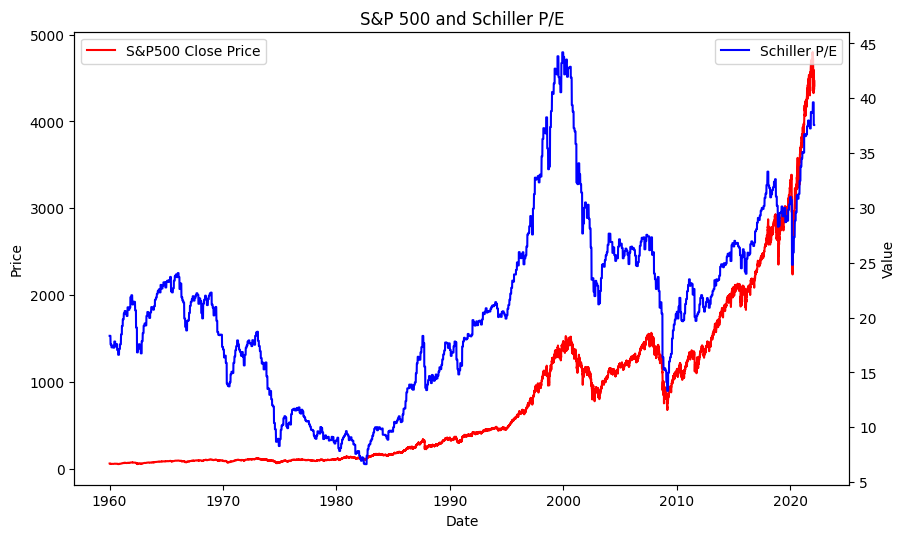

In [5]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(data.Date, data.Close.values, 'red', label = 'S&P500 Close Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
ax2=plt.twinx()
ax2.plot(data.Date, data.PE.values, 'blue', label = 'Schiller P/E')
ax2.set_ylabel("Value")
plt.legend()

plt.title("S&P 500 and Schiller P/E")
plt

In [6]:
step2_data = data[['Close','PE']].values
step2_data

array([[  59.91    ,   18.34    ],
       [  60.389999,   18.34    ],
       [  60.130001,   18.34    ],
       ...,
       [4471.07    ,   37.56    ],
       [4475.01    ,   37.56    ],
       [4380.26    ,   37.56    ]])

In [7]:
step2_date_data = data['Date'].values
step2_date_data

array(['1960-01-04T00:00:00.000000000', '1960-01-05T00:00:00.000000000',
       '1960-01-06T00:00:00.000000000', ...,
       '2022-02-15T00:00:00.000000000', '2022-02-16T00:00:00.000000000',
       '2022-02-17T00:00:00.000000000'], dtype='datetime64[ns]')

In [8]:
window_size = 28
corr_array = []
corr_date_array = []
for i in range(step2_data.shape[0]-window_size + 1):
    x = step2_data[i:i+window_size, 0]
    y = step2_data[i:i+window_size, 1]
    corr = np.corrcoef(x, y)
    corr_array.append(corr[1, 0])
    corr_date_array.append(step2_date_data[i+window_size - 1])

C:\Users\zhhua\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\zhhua\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

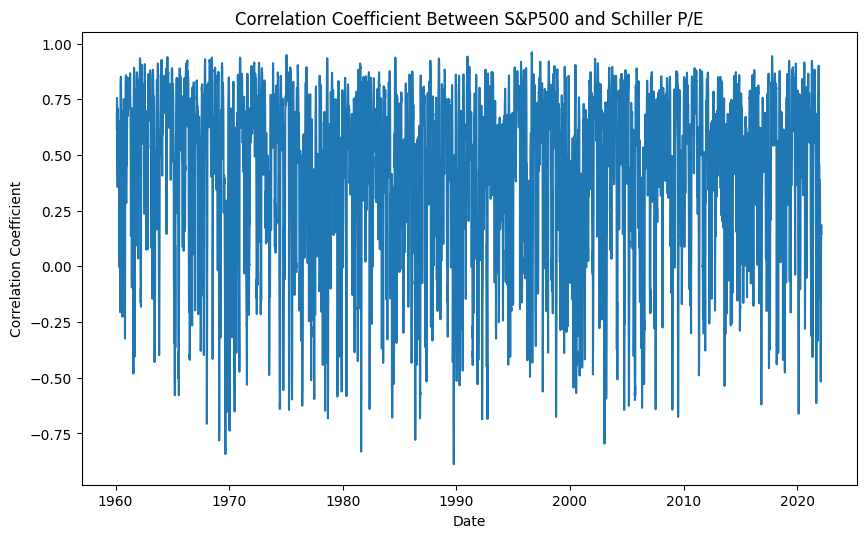

In [9]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(corr_date_array, corr_array, label = 'Corr')
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation Coefficient Between S&P500 and Schiller P/E")
plt

In [154]:
initial_price = None
profit = 0
sell_point_array = []
buy_point_price_array = []
buy_point_date_array = []
label_set = np.zeros([len(corr_array), 1])

for i in range(len(corr_array)):
    if (corr_array[i] <= -0.50 and corr_array[i] >= -1):
        sell_point_array.append(corr_array[i])
        local_data = data.loc[(  data['Date'] >= str(corr_date_array[i - window_size + 1]).replace('T00:00:00.000000000', ''))]
        local_data = local_data.loc[( str(corr_date_array[i]).replace('T00:00:00.000000000', '') >= local_data['Date'] )]
        local_data = local_data['Close'].values
        sell_point_price = np.amax(local_data)
        if not initial_price:
            initial_price = sell_point_price
            share_amount = int(1000000 / initial_price)
            print('share_amount: %s' % share_amount)
        buy_point_date_array.append(corr_date_array[i])
        buy_point_data = data.loc[(  data['Date'] == str(corr_date_array[i]).replace('T00:00:00.000000000', ''))]
        buy_point_close_price_data = buy_point_data['Close'].values
        label_set[i] = 1
        profit +=  sell_point_price - buy_point_close_price_data
print(len(buy_point_date_array))
print('total profit: %s' % str(profit*share_amount))

share_amount: 11437
268
total profit: [38574478.13504402]


In [155]:
len(corr_array)

15649

In [156]:
for i in label_set:
    if i[0] == 0:
        print(i)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [157]:
dataset = data[['Close']].values
date = data[['Date']].values
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.00162509],
       [0.00172626],
       [0.00167146],
       ...,
       [0.93139433],
       [0.93222479],
       [0.91225371]])

<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

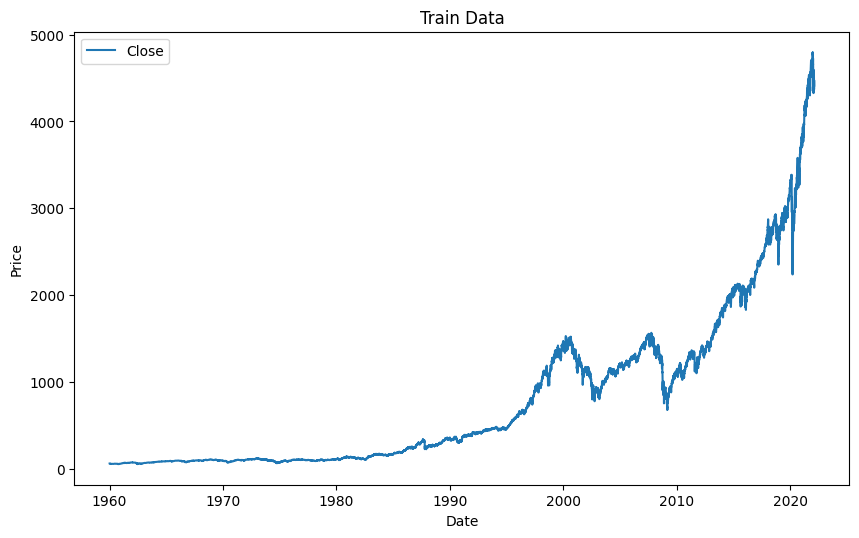

In [158]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(date[:, 0], data.Close.values, label = 'Close')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Train Data")
plt

In [159]:
test_dataset = test_data[['Close']].values
test_date = test_data[['Date']].values
test_dataset = scaler.fit_transform(test_dataset)
test_date.shape

(10661, 1)

<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

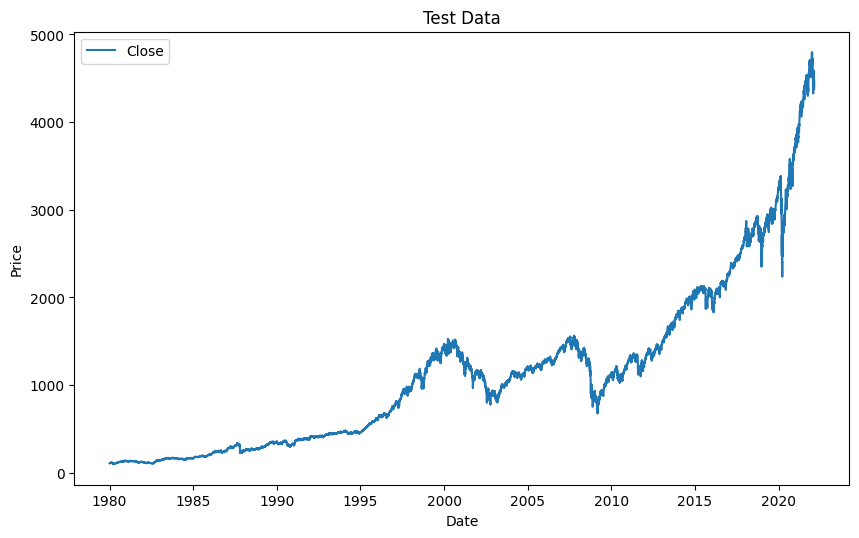

In [160]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(test_date[:, 0], test_data.Close.values, label = 'Close')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Test Data")
plt

In [161]:
cnn_full_dataset = []
for i in range(data.shape[0]-window_size + 1):
    cnn_dataset = dataset[i:i+window_size]
    cnn_full_dataset.append(np.transpose(cnn_dataset))
cnn_full_dataset = np.array(cnn_full_dataset)
cnn_full_dataset.shape

(15649, 1, 28)

In [162]:
cnn_full_dataset

array([[[1.62508726e-03, 1.72625981e-03, 1.67145832e-03, ...,
         6.57622735e-04, 7.67226560e-04, 6.93455176e-04]],

       [[1.72625981e-03, 1.67145832e-03, 1.57871620e-03, ...,
         7.67226560e-04, 6.93455176e-04, 6.28114013e-04]],

       [[1.67145832e-03, 1.57871620e-03, 1.53866886e-03, ...,
         6.93455176e-04, 6.28114013e-04, 6.87131247e-04]],

       ...,

       [[9.78814845e-01, 9.74805875e-01, 9.73385241e-01, ...,
         9.20343313e-01, 9.16766434e-01, 9.31394329e-01]],

       [[9.74805875e-01, 9.73385241e-01, 9.82402263e-01, ...,
         9.16766434e-01, 9.31394329e-01, 9.32224789e-01]],

       [[9.73385241e-01, 9.82402263e-01, 9.85201376e-01, ...,
         9.31394329e-01, 9.32224789e-01, 9.12253708e-01]]])

In [163]:
cnn_test_dataset = []
for i in range(test_dataset.shape[0]-window_size + 1):
    cnn_dataset = test_dataset[i:i+window_size]
    cnn_test_dataset.append(np.transpose(cnn_dataset))
cnn_test_dataset = np.array(cnn_test_dataset)
cnn_test_dataset.shape

(10634, 1, 28)

In [164]:
test_price_differences = []
for idx_window, prices_28_list in enumerate(cnn_test_dataset):
    print('working on %s' % idx_window)
    price_differences = []
    for idx, price in enumerate(prices_28_list[0]):
#         print('price: %s' % price)
        if idx != 0:
            difference = prices_28_list[0][idx - 1] - price
#             print(difference)
#             print(type(difference))
            if difference < 0:
                price_differences.append(-1)
            else:
                price_differences.append(1)
    test_price_differences.append(price_differences)

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 1419
working on 1420
working on 1421
working on 1422
working on 1423
working on 1424
working on 1425
working on 1426
working on 1427
working on 1428
working on 1429
working on 1430
working on 1431
working on 1432
working on 1433
working on 1434
working on 1435
working on 1436
working on 1437
working on 1438
working on 1439
working on 1440
working on 1441
working on 1442
working on 1443
working on 1444
working on 1445
working on 1446
working on 1447
working on 1448
working on 1449
working on 1450
working on 1451
working on 1452
working on 1453
working on 1454
working on 1455
working on 1456
working on 1457
working on 1458
working on 1459
working on 1460
working on 1461
working on 1462
working on 1463
working on 1464
working on 1465
working on 1466
working on 1467
working on 1468
working on 1469
working on 1470
working on 1471
working on 1472
working on 1473
working on 1474
working on 1475
working on 1476
working on 1477
working on 1478
working on 1479
working on 1480
working 

working on 2418
working on 2419
working on 2420
working on 2421
working on 2422
working on 2423
working on 2424
working on 2425
working on 2426
working on 2427
working on 2428
working on 2429
working on 2430
working on 2431
working on 2432
working on 2433
working on 2434
working on 2435
working on 2436
working on 2437
working on 2438
working on 2439
working on 2440
working on 2441
working on 2442
working on 2443
working on 2444
working on 2445
working on 2446
working on 2447
working on 2448
working on 2449
working on 2450
working on 2451
working on 2452
working on 2453
working on 2454
working on 2455
working on 2456
working on 2457
working on 2458
working on 2459
working on 2460
working on 2461
working on 2462
working on 2463
working on 2464
working on 2465
working on 2466
working on 2467
working on 2468
working on 2469
working on 2470
working on 2471
working on 2472
working on 2473
working on 2474
working on 2475
working on 2476
working on 2477
working on 2478
working on 2479
working 

working on 3531
working on 3532
working on 3533
working on 3534
working on 3535
working on 3536
working on 3537
working on 3538
working on 3539
working on 3540
working on 3541
working on 3542
working on 3543
working on 3544
working on 3545
working on 3546
working on 3547
working on 3548
working on 3549
working on 3550
working on 3551
working on 3552
working on 3553
working on 3554
working on 3555
working on 3556
working on 3557
working on 3558
working on 3559
working on 3560
working on 3561
working on 3562
working on 3563
working on 3564
working on 3565
working on 3566
working on 3567
working on 3568
working on 3569
working on 3570
working on 3571
working on 3572
working on 3573
working on 3574
working on 3575
working on 3576
working on 3577
working on 3578
working on 3579
working on 3580
working on 3581
working on 3582
working on 3583
working on 3584
working on 3585
working on 3586
working on 3587
working on 3588
working on 3589
working on 3590
working on 3591
working on 3592
working 

working on 4850
working on 4851
working on 4852
working on 4853
working on 4854
working on 4855
working on 4856
working on 4857
working on 4858
working on 4859
working on 4860
working on 4861
working on 4862
working on 4863
working on 4864
working on 4865
working on 4866
working on 4867
working on 4868
working on 4869
working on 4870
working on 4871
working on 4872
working on 4873
working on 4874
working on 4875
working on 4876
working on 4877
working on 4878
working on 4879
working on 4880
working on 4881
working on 4882
working on 4883
working on 4884
working on 4885
working on 4886
working on 4887
working on 4888
working on 4889
working on 4890
working on 4891
working on 4892
working on 4893
working on 4894
working on 4895
working on 4896
working on 4897
working on 4898
working on 4899
working on 4900
working on 4901
working on 4902
working on 4903
working on 4904
working on 4905
working on 4906
working on 4907
working on 4908
working on 4909
working on 4910
working on 4911
working 

working on 6271
working on 6272
working on 6273
working on 6274
working on 6275
working on 6276
working on 6277
working on 6278
working on 6279
working on 6280
working on 6281
working on 6282
working on 6283
working on 6284
working on 6285
working on 6286
working on 6287
working on 6288
working on 6289
working on 6290
working on 6291
working on 6292
working on 6293
working on 6294
working on 6295
working on 6296
working on 6297
working on 6298
working on 6299
working on 6300
working on 6301
working on 6302
working on 6303
working on 6304
working on 6305
working on 6306
working on 6307
working on 6308
working on 6309
working on 6310
working on 6311
working on 6312
working on 6313
working on 6314
working on 6315
working on 6316
working on 6317
working on 6318
working on 6319
working on 6320
working on 6321
working on 6322
working on 6323
working on 6324
working on 6325
working on 6326
working on 6327
working on 6328
working on 6329
working on 6330
working on 6331
working on 6332
working 

working on 7916
working on 7917
working on 7918
working on 7919
working on 7920
working on 7921
working on 7922
working on 7923
working on 7924
working on 7925
working on 7926
working on 7927
working on 7928
working on 7929
working on 7930
working on 7931
working on 7932
working on 7933
working on 7934
working on 7935
working on 7936
working on 7937
working on 7938
working on 7939
working on 7940
working on 7941
working on 7942
working on 7943
working on 7944
working on 7945
working on 7946
working on 7947
working on 7948
working on 7949
working on 7950
working on 7951
working on 7952
working on 7953
working on 7954
working on 7955
working on 7956
working on 7957
working on 7958
working on 7959
working on 7960
working on 7961
working on 7962
working on 7963
working on 7964
working on 7965
working on 7966
working on 7967
working on 7968
working on 7969
working on 7970
working on 7971
working on 7972
working on 7973
working on 7974
working on 7975
working on 7976
working on 7977
working 

working on 9416
working on 9417
working on 9418
working on 9419
working on 9420
working on 9421
working on 9422
working on 9423
working on 9424
working on 9425
working on 9426
working on 9427
working on 9428
working on 9429
working on 9430
working on 9431
working on 9432
working on 9433
working on 9434
working on 9435
working on 9436
working on 9437
working on 9438
working on 9439
working on 9440
working on 9441
working on 9442
working on 9443
working on 9444
working on 9445
working on 9446
working on 9447
working on 9448
working on 9449
working on 9450
working on 9451
working on 9452
working on 9453
working on 9454
working on 9455
working on 9456
working on 9457
working on 9458
working on 9459
working on 9460
working on 9461
working on 9462
working on 9463
working on 9464
working on 9465
working on 9466
working on 9467
working on 9468
working on 9469
working on 9470
working on 9471
working on 9472
working on 9473
working on 9474
working on 9475
working on 9476
working on 9477
working 

In [165]:
test_price_differences = np.array(test_price_differences)
test_price_differences = test_price_differences.reshape((10634, 1, 27))
cnn_test_dataset = test_price_differences

In [166]:
date_list = np.array(corr_date_array)
date_list.shape

(15649,)

In [167]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=10, kernel_size=3, padding=1)
        self.activate1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=10, out_channels=20, kernel_size=3)
        self.activate2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool1d(kernel_size=2)
        self.conv3 = nn.Conv1d(in_channels=20, out_channels=40, kernel_size=3)
        self.linear = nn.Linear(40*3, 2)
        self.activate3 = nn.Softmax()
    def forward(self, x):
        x = self.conv1(x)
        x = self.activate1(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = self.activate2(x)
        x = self.max_pool2(x)
        x = self.conv3(x)

        x = x.view(-1, 40*3)
        x = self.linear(x)
#         x = self.activate3(x)
        return x

In [168]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers        
        self.rnn = nn.GRU(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
#         print(x.shape)
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        res, hidden = self.rnn(x, hidden)
        res = self.linear(res)
        return res[:, -1, :], hidden
        
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        return hidden

In [169]:
cnn_model = CNN()
cnn_learning_rate = 0.001
cnn_num_epochs = 100
cnn_model

CNN(
  (conv1): Conv1d(1, 10, kernel_size=(3,), stride=(1,), padding=(1,))
  (activate1): ReLU()
  (max_pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(10, 20, kernel_size=(3,), stride=(1,))
  (activate2): ReLU()
  (max_pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(20, 40, kernel_size=(3,), stride=(1,))
  (linear): Linear(in_features=120, out_features=2, bias=True)
  (activate3): Softmax(dim=None)
)

In [170]:
inputs = Variable(torch.from_numpy(cnn_full_dataset).float())
for idx, i in enumerate(inputs):
    print('Now is working on: %s' % idx)
    for new_array_idx, new_array_i in enumerate(i[0]):
#         print(new_array_idx)
        if new_array_idx == 0:
#             print(np.array(new_array_idx), new_array_i.detach().numpy())
#             print(type(np.array(new_array_idx)), type(new_array_i.detach().numpy()))
            price_list = [float(new_array_i)]
            day_list = [new_array_idx]
#             print(new_list)
#             print(type(new_list))
        else:
            price_list += [float(new_array_i)]
            day_list += [new_array_idx]
#             print(new_list)
#             print(new_array, a)
#             print(type(new_array), type(a))
#             new_array = np.concatenate(new_array, a)
    if idx == 0:
        inputs_copy_price_list = [price_list]
        inputs_copy_day_list = [day_list]
    else:
        inputs_copy_price_list += [price_list]
        inputs_copy_day_list += [day_list]

Now is working on: 0
Now is working on: 1
Now is working on: 2
Now is working on: 3
Now is working on: 4
Now is working on: 5
Now is working on: 6
Now is working on: 7
Now is working on: 8
Now is working on: 9
Now is working on: 10
Now is working on: 11
Now is working on: 12
Now is working on: 13
Now is working on: 14
Now is working on: 15
Now is working on: 16
Now is working on: 17
Now is working on: 18
Now is working on: 19
Now is working on: 20
Now is working on: 21
Now is working on: 22
Now is working on: 23
Now is working on: 24
Now is working on: 25
Now is working on: 26
Now is working on: 27
Now is working on: 28
Now is working on: 29
Now is working on: 30
Now is working on: 31
Now is working on: 32
Now is working on: 33
Now is working on: 34
Now is working on: 35
Now is working on: 36
Now is working on: 37
Now is working on: 38
Now is working on: 39
Now is working on: 40
Now is working on: 41
Now is working on: 42
Now is working on: 43
Now is working on: 44
Now is working on: 4

Now is working on: 488
Now is working on: 489
Now is working on: 490
Now is working on: 491
Now is working on: 492
Now is working on: 493
Now is working on: 494
Now is working on: 495
Now is working on: 496
Now is working on: 497
Now is working on: 498
Now is working on: 499
Now is working on: 500
Now is working on: 501
Now is working on: 502
Now is working on: 503
Now is working on: 504
Now is working on: 505
Now is working on: 506
Now is working on: 507
Now is working on: 508
Now is working on: 509
Now is working on: 510
Now is working on: 511
Now is working on: 512
Now is working on: 513
Now is working on: 514
Now is working on: 515
Now is working on: 516
Now is working on: 517
Now is working on: 518
Now is working on: 519
Now is working on: 520
Now is working on: 521
Now is working on: 522
Now is working on: 523
Now is working on: 524
Now is working on: 525
Now is working on: 526
Now is working on: 527
Now is working on: 528
Now is working on: 529
Now is working on: 530
Now is work

Now is working on: 1222
Now is working on: 1223
Now is working on: 1224
Now is working on: 1225
Now is working on: 1226
Now is working on: 1227
Now is working on: 1228
Now is working on: 1229
Now is working on: 1230
Now is working on: 1231
Now is working on: 1232
Now is working on: 1233
Now is working on: 1234
Now is working on: 1235
Now is working on: 1236
Now is working on: 1237
Now is working on: 1238
Now is working on: 1239
Now is working on: 1240
Now is working on: 1241
Now is working on: 1242
Now is working on: 1243
Now is working on: 1244
Now is working on: 1245
Now is working on: 1246
Now is working on: 1247
Now is working on: 1248
Now is working on: 1249
Now is working on: 1250
Now is working on: 1251
Now is working on: 1252
Now is working on: 1253
Now is working on: 1254
Now is working on: 1255
Now is working on: 1256
Now is working on: 1257
Now is working on: 1258
Now is working on: 1259
Now is working on: 1260
Now is working on: 1261
Now is working on: 1262
Now is working o

Now is working on: 1970
Now is working on: 1971
Now is working on: 1972
Now is working on: 1973
Now is working on: 1974
Now is working on: 1975
Now is working on: 1976
Now is working on: 1977
Now is working on: 1978
Now is working on: 1979
Now is working on: 1980
Now is working on: 1981
Now is working on: 1982
Now is working on: 1983
Now is working on: 1984
Now is working on: 1985
Now is working on: 1986
Now is working on: 1987
Now is working on: 1988
Now is working on: 1989
Now is working on: 1990
Now is working on: 1991
Now is working on: 1992
Now is working on: 1993
Now is working on: 1994
Now is working on: 1995
Now is working on: 1996
Now is working on: 1997
Now is working on: 1998
Now is working on: 1999
Now is working on: 2000
Now is working on: 2001
Now is working on: 2002
Now is working on: 2003
Now is working on: 2004
Now is working on: 2005
Now is working on: 2006
Now is working on: 2007
Now is working on: 2008
Now is working on: 2009
Now is working on: 2010
Now is working o

Now is working on: 2704
Now is working on: 2705
Now is working on: 2706
Now is working on: 2707
Now is working on: 2708
Now is working on: 2709
Now is working on: 2710
Now is working on: 2711
Now is working on: 2712
Now is working on: 2713
Now is working on: 2714
Now is working on: 2715
Now is working on: 2716
Now is working on: 2717
Now is working on: 2718
Now is working on: 2719
Now is working on: 2720
Now is working on: 2721
Now is working on: 2722
Now is working on: 2723
Now is working on: 2724
Now is working on: 2725
Now is working on: 2726
Now is working on: 2727
Now is working on: 2728
Now is working on: 2729
Now is working on: 2730
Now is working on: 2731
Now is working on: 2732
Now is working on: 2733
Now is working on: 2734
Now is working on: 2735
Now is working on: 2736
Now is working on: 2737
Now is working on: 2738
Now is working on: 2739
Now is working on: 2740
Now is working on: 2741
Now is working on: 2742
Now is working on: 2743
Now is working on: 2744
Now is working o

Now is working on: 3519
Now is working on: 3520
Now is working on: 3521
Now is working on: 3522
Now is working on: 3523
Now is working on: 3524
Now is working on: 3525
Now is working on: 3526
Now is working on: 3527
Now is working on: 3528
Now is working on: 3529
Now is working on: 3530
Now is working on: 3531
Now is working on: 3532
Now is working on: 3533
Now is working on: 3534
Now is working on: 3535
Now is working on: 3536
Now is working on: 3537
Now is working on: 3538
Now is working on: 3539
Now is working on: 3540
Now is working on: 3541
Now is working on: 3542
Now is working on: 3543
Now is working on: 3544
Now is working on: 3545
Now is working on: 3546
Now is working on: 3547
Now is working on: 3548
Now is working on: 3549
Now is working on: 3550
Now is working on: 3551
Now is working on: 3552
Now is working on: 3553
Now is working on: 3554
Now is working on: 3555
Now is working on: 3556
Now is working on: 3557
Now is working on: 3558
Now is working on: 3559
Now is working o

Now is working on: 4294
Now is working on: 4295
Now is working on: 4296
Now is working on: 4297
Now is working on: 4298
Now is working on: 4299
Now is working on: 4300
Now is working on: 4301
Now is working on: 4302
Now is working on: 4303
Now is working on: 4304
Now is working on: 4305
Now is working on: 4306
Now is working on: 4307
Now is working on: 4308
Now is working on: 4309
Now is working on: 4310
Now is working on: 4311
Now is working on: 4312
Now is working on: 4313
Now is working on: 4314
Now is working on: 4315
Now is working on: 4316
Now is working on: 4317
Now is working on: 4318
Now is working on: 4319
Now is working on: 4320
Now is working on: 4321
Now is working on: 4322
Now is working on: 4323
Now is working on: 4324
Now is working on: 4325
Now is working on: 4326
Now is working on: 4327
Now is working on: 4328
Now is working on: 4329
Now is working on: 4330
Now is working on: 4331
Now is working on: 4332
Now is working on: 4333
Now is working on: 4334
Now is working o

Now is working on: 4995
Now is working on: 4996
Now is working on: 4997
Now is working on: 4998
Now is working on: 4999
Now is working on: 5000
Now is working on: 5001
Now is working on: 5002
Now is working on: 5003
Now is working on: 5004
Now is working on: 5005
Now is working on: 5006
Now is working on: 5007
Now is working on: 5008
Now is working on: 5009
Now is working on: 5010
Now is working on: 5011
Now is working on: 5012
Now is working on: 5013
Now is working on: 5014
Now is working on: 5015
Now is working on: 5016
Now is working on: 5017
Now is working on: 5018
Now is working on: 5019
Now is working on: 5020
Now is working on: 5021
Now is working on: 5022
Now is working on: 5023
Now is working on: 5024
Now is working on: 5025
Now is working on: 5026
Now is working on: 5027
Now is working on: 5028
Now is working on: 5029
Now is working on: 5030
Now is working on: 5031
Now is working on: 5032
Now is working on: 5033
Now is working on: 5034
Now is working on: 5035
Now is working o

Now is working on: 5765
Now is working on: 5766
Now is working on: 5767
Now is working on: 5768
Now is working on: 5769
Now is working on: 5770
Now is working on: 5771
Now is working on: 5772
Now is working on: 5773
Now is working on: 5774
Now is working on: 5775
Now is working on: 5776
Now is working on: 5777
Now is working on: 5778
Now is working on: 5779
Now is working on: 5780
Now is working on: 5781
Now is working on: 5782
Now is working on: 5783
Now is working on: 5784
Now is working on: 5785
Now is working on: 5786
Now is working on: 5787
Now is working on: 5788
Now is working on: 5789
Now is working on: 5790
Now is working on: 5791
Now is working on: 5792
Now is working on: 5793
Now is working on: 5794
Now is working on: 5795
Now is working on: 5796
Now is working on: 5797
Now is working on: 5798
Now is working on: 5799
Now is working on: 5800
Now is working on: 5801
Now is working on: 5802
Now is working on: 5803
Now is working on: 5804
Now is working on: 5805
Now is working o

Now is working on: 6485
Now is working on: 6486
Now is working on: 6487
Now is working on: 6488
Now is working on: 6489
Now is working on: 6490
Now is working on: 6491
Now is working on: 6492
Now is working on: 6493
Now is working on: 6494
Now is working on: 6495
Now is working on: 6496
Now is working on: 6497
Now is working on: 6498
Now is working on: 6499
Now is working on: 6500
Now is working on: 6501
Now is working on: 6502
Now is working on: 6503
Now is working on: 6504
Now is working on: 6505
Now is working on: 6506
Now is working on: 6507
Now is working on: 6508
Now is working on: 6509
Now is working on: 6510
Now is working on: 6511
Now is working on: 6512
Now is working on: 6513
Now is working on: 6514
Now is working on: 6515
Now is working on: 6516
Now is working on: 6517
Now is working on: 6518
Now is working on: 6519
Now is working on: 6520
Now is working on: 6521
Now is working on: 6522
Now is working on: 6523
Now is working on: 6524
Now is working on: 6525
Now is working o

Now is working on: 7105
Now is working on: 7106
Now is working on: 7107
Now is working on: 7108
Now is working on: 7109
Now is working on: 7110
Now is working on: 7111
Now is working on: 7112
Now is working on: 7113
Now is working on: 7114
Now is working on: 7115
Now is working on: 7116
Now is working on: 7117
Now is working on: 7118
Now is working on: 7119
Now is working on: 7120
Now is working on: 7121
Now is working on: 7122
Now is working on: 7123
Now is working on: 7124
Now is working on: 7125
Now is working on: 7126
Now is working on: 7127
Now is working on: 7128
Now is working on: 7129
Now is working on: 7130
Now is working on: 7131
Now is working on: 7132
Now is working on: 7133
Now is working on: 7134
Now is working on: 7135
Now is working on: 7136
Now is working on: 7137
Now is working on: 7138
Now is working on: 7139
Now is working on: 7140
Now is working on: 7141
Now is working on: 7142
Now is working on: 7143
Now is working on: 7144
Now is working on: 7145
Now is working o

Now is working on: 7873
Now is working on: 7874
Now is working on: 7875
Now is working on: 7876
Now is working on: 7877
Now is working on: 7878
Now is working on: 7879
Now is working on: 7880
Now is working on: 7881
Now is working on: 7882
Now is working on: 7883
Now is working on: 7884
Now is working on: 7885
Now is working on: 7886
Now is working on: 7887
Now is working on: 7888
Now is working on: 7889
Now is working on: 7890
Now is working on: 7891
Now is working on: 7892
Now is working on: 7893
Now is working on: 7894
Now is working on: 7895
Now is working on: 7896
Now is working on: 7897
Now is working on: 7898
Now is working on: 7899
Now is working on: 7900
Now is working on: 7901
Now is working on: 7902
Now is working on: 7903
Now is working on: 7904
Now is working on: 7905
Now is working on: 7906
Now is working on: 7907
Now is working on: 7908
Now is working on: 7909
Now is working on: 7910
Now is working on: 7911
Now is working on: 7912
Now is working on: 7913
Now is working o

Now is working on: 8619
Now is working on: 8620
Now is working on: 8621
Now is working on: 8622
Now is working on: 8623
Now is working on: 8624
Now is working on: 8625
Now is working on: 8626
Now is working on: 8627
Now is working on: 8628
Now is working on: 8629
Now is working on: 8630
Now is working on: 8631
Now is working on: 8632
Now is working on: 8633
Now is working on: 8634
Now is working on: 8635
Now is working on: 8636
Now is working on: 8637
Now is working on: 8638
Now is working on: 8639
Now is working on: 8640
Now is working on: 8641
Now is working on: 8642
Now is working on: 8643
Now is working on: 8644
Now is working on: 8645
Now is working on: 8646
Now is working on: 8647
Now is working on: 8648
Now is working on: 8649
Now is working on: 8650
Now is working on: 8651
Now is working on: 8652
Now is working on: 8653
Now is working on: 8654
Now is working on: 8655
Now is working on: 8656
Now is working on: 8657
Now is working on: 8658
Now is working on: 8659
Now is working o

Now is working on: 9338
Now is working on: 9339
Now is working on: 9340
Now is working on: 9341
Now is working on: 9342
Now is working on: 9343
Now is working on: 9344
Now is working on: 9345
Now is working on: 9346
Now is working on: 9347
Now is working on: 9348
Now is working on: 9349
Now is working on: 9350
Now is working on: 9351
Now is working on: 9352
Now is working on: 9353
Now is working on: 9354
Now is working on: 9355
Now is working on: 9356
Now is working on: 9357
Now is working on: 9358
Now is working on: 9359
Now is working on: 9360
Now is working on: 9361
Now is working on: 9362
Now is working on: 9363
Now is working on: 9364
Now is working on: 9365
Now is working on: 9366
Now is working on: 9367
Now is working on: 9368
Now is working on: 9369
Now is working on: 9370
Now is working on: 9371
Now is working on: 9372
Now is working on: 9373
Now is working on: 9374
Now is working on: 9375
Now is working on: 9376
Now is working on: 9377
Now is working on: 9378
Now is working o

Now is working on: 10005
Now is working on: 10006
Now is working on: 10007
Now is working on: 10008
Now is working on: 10009
Now is working on: 10010
Now is working on: 10011
Now is working on: 10012
Now is working on: 10013
Now is working on: 10014
Now is working on: 10015
Now is working on: 10016
Now is working on: 10017
Now is working on: 10018
Now is working on: 10019
Now is working on: 10020
Now is working on: 10021
Now is working on: 10022
Now is working on: 10023
Now is working on: 10024
Now is working on: 10025
Now is working on: 10026
Now is working on: 10027
Now is working on: 10028
Now is working on: 10029
Now is working on: 10030
Now is working on: 10031
Now is working on: 10032
Now is working on: 10033
Now is working on: 10034
Now is working on: 10035
Now is working on: 10036
Now is working on: 10037
Now is working on: 10038
Now is working on: 10039
Now is working on: 10040
Now is working on: 10041
Now is working on: 10042
Now is working on: 10043
Now is working on: 10044


Now is working on: 10734
Now is working on: 10735
Now is working on: 10736
Now is working on: 10737
Now is working on: 10738
Now is working on: 10739
Now is working on: 10740
Now is working on: 10741
Now is working on: 10742
Now is working on: 10743
Now is working on: 10744
Now is working on: 10745
Now is working on: 10746
Now is working on: 10747
Now is working on: 10748
Now is working on: 10749
Now is working on: 10750
Now is working on: 10751
Now is working on: 10752
Now is working on: 10753
Now is working on: 10754
Now is working on: 10755
Now is working on: 10756
Now is working on: 10757
Now is working on: 10758
Now is working on: 10759
Now is working on: 10760
Now is working on: 10761
Now is working on: 10762
Now is working on: 10763
Now is working on: 10764
Now is working on: 10765
Now is working on: 10766
Now is working on: 10767
Now is working on: 10768
Now is working on: 10769
Now is working on: 10770
Now is working on: 10771
Now is working on: 10772
Now is working on: 10773


Now is working on: 11518
Now is working on: 11519
Now is working on: 11520
Now is working on: 11521
Now is working on: 11522
Now is working on: 11523
Now is working on: 11524
Now is working on: 11525
Now is working on: 11526
Now is working on: 11527
Now is working on: 11528
Now is working on: 11529
Now is working on: 11530
Now is working on: 11531
Now is working on: 11532
Now is working on: 11533
Now is working on: 11534
Now is working on: 11535
Now is working on: 11536
Now is working on: 11537
Now is working on: 11538
Now is working on: 11539
Now is working on: 11540
Now is working on: 11541
Now is working on: 11542
Now is working on: 11543
Now is working on: 11544
Now is working on: 11545
Now is working on: 11546
Now is working on: 11547
Now is working on: 11548
Now is working on: 11549
Now is working on: 11550
Now is working on: 11551
Now is working on: 11552
Now is working on: 11553
Now is working on: 11554
Now is working on: 11555
Now is working on: 11556
Now is working on: 11557


Now is working on: 12259
Now is working on: 12260
Now is working on: 12261
Now is working on: 12262
Now is working on: 12263
Now is working on: 12264
Now is working on: 12265
Now is working on: 12266
Now is working on: 12267
Now is working on: 12268
Now is working on: 12269
Now is working on: 12270
Now is working on: 12271
Now is working on: 12272
Now is working on: 12273
Now is working on: 12274
Now is working on: 12275
Now is working on: 12276
Now is working on: 12277
Now is working on: 12278
Now is working on: 12279
Now is working on: 12280
Now is working on: 12281
Now is working on: 12282
Now is working on: 12283
Now is working on: 12284
Now is working on: 12285
Now is working on: 12286
Now is working on: 12287
Now is working on: 12288
Now is working on: 12289
Now is working on: 12290
Now is working on: 12291
Now is working on: 12292
Now is working on: 12293
Now is working on: 12294
Now is working on: 12295
Now is working on: 12296
Now is working on: 12297
Now is working on: 12298


Now is working on: 12964
Now is working on: 12965
Now is working on: 12966
Now is working on: 12967
Now is working on: 12968
Now is working on: 12969
Now is working on: 12970
Now is working on: 12971
Now is working on: 12972
Now is working on: 12973
Now is working on: 12974
Now is working on: 12975
Now is working on: 12976
Now is working on: 12977
Now is working on: 12978
Now is working on: 12979
Now is working on: 12980
Now is working on: 12981
Now is working on: 12982
Now is working on: 12983
Now is working on: 12984
Now is working on: 12985
Now is working on: 12986
Now is working on: 12987
Now is working on: 12988
Now is working on: 12989
Now is working on: 12990
Now is working on: 12991
Now is working on: 12992
Now is working on: 12993
Now is working on: 12994
Now is working on: 12995
Now is working on: 12996
Now is working on: 12997
Now is working on: 12998
Now is working on: 12999
Now is working on: 13000
Now is working on: 13001
Now is working on: 13002
Now is working on: 13003


Now is working on: 13616
Now is working on: 13617
Now is working on: 13618
Now is working on: 13619
Now is working on: 13620
Now is working on: 13621
Now is working on: 13622
Now is working on: 13623
Now is working on: 13624
Now is working on: 13625
Now is working on: 13626
Now is working on: 13627
Now is working on: 13628
Now is working on: 13629
Now is working on: 13630
Now is working on: 13631
Now is working on: 13632
Now is working on: 13633
Now is working on: 13634
Now is working on: 13635
Now is working on: 13636
Now is working on: 13637
Now is working on: 13638
Now is working on: 13639
Now is working on: 13640
Now is working on: 13641
Now is working on: 13642
Now is working on: 13643
Now is working on: 13644
Now is working on: 13645
Now is working on: 13646
Now is working on: 13647
Now is working on: 13648
Now is working on: 13649
Now is working on: 13650
Now is working on: 13651
Now is working on: 13652
Now is working on: 13653
Now is working on: 13654
Now is working on: 13655


Now is working on: 14326
Now is working on: 14327
Now is working on: 14328
Now is working on: 14329
Now is working on: 14330
Now is working on: 14331
Now is working on: 14332
Now is working on: 14333
Now is working on: 14334
Now is working on: 14335
Now is working on: 14336
Now is working on: 14337
Now is working on: 14338
Now is working on: 14339
Now is working on: 14340
Now is working on: 14341
Now is working on: 14342
Now is working on: 14343
Now is working on: 14344
Now is working on: 14345
Now is working on: 14346
Now is working on: 14347
Now is working on: 14348
Now is working on: 14349
Now is working on: 14350
Now is working on: 14351
Now is working on: 14352
Now is working on: 14353
Now is working on: 14354
Now is working on: 14355
Now is working on: 14356
Now is working on: 14357
Now is working on: 14358
Now is working on: 14359
Now is working on: 14360
Now is working on: 14361
Now is working on: 14362
Now is working on: 14363
Now is working on: 14364
Now is working on: 14365


Now is working on: 15125
Now is working on: 15126
Now is working on: 15127
Now is working on: 15128
Now is working on: 15129
Now is working on: 15130
Now is working on: 15131
Now is working on: 15132
Now is working on: 15133
Now is working on: 15134
Now is working on: 15135
Now is working on: 15136
Now is working on: 15137
Now is working on: 15138
Now is working on: 15139
Now is working on: 15140
Now is working on: 15141
Now is working on: 15142
Now is working on: 15143
Now is working on: 15144
Now is working on: 15145
Now is working on: 15146
Now is working on: 15147
Now is working on: 15148
Now is working on: 15149
Now is working on: 15150
Now is working on: 15151
Now is working on: 15152
Now is working on: 15153
Now is working on: 15154
Now is working on: 15155
Now is working on: 15156
Now is working on: 15157
Now is working on: 15158
Now is working on: 15159
Now is working on: 15160
Now is working on: 15161
Now is working on: 15162
Now is working on: 15163
Now is working on: 15164


In [171]:
inputs_price_list = np.array(inputs_copy_price_list).reshape((15649, 1, 28))
inputs_day_list = np.array(inputs_copy_day_list).reshape((15649, 1, 28))
# print(inputs_price_list.shape)
# print(inputs_day_list.shape)
total_day_price_list = []
for i in range(inputs_price_list.shape[0]):
    print('Working on %s' % i)
    day_price_list = []
    for idx, price in enumerate(inputs_price_list[0]):
        day_price = [inputs_day_list[0][idx], price]
        day_price_list.append(day_price)
    total_day_price_list.append(day_price_list)

Working on 0
Working on 1
Working on 2
Working on 3
Working on 4
Working on 5
Working on 6
Working on 7
Working on 8
Working on 9
Working on 10
Working on 11
Working on 12
Working on 13
Working on 14
Working on 15
Working on 16
Working on 17
Working on 18
Working on 19
Working on 20
Working on 21
Working on 22
Working on 23
Working on 24
Working on 25
Working on 26
Working on 27
Working on 28
Working on 29
Working on 30
Working on 31
Working on 32
Working on 33
Working on 34
Working on 35
Working on 36
Working on 37
Working on 38
Working on 39
Working on 40
Working on 41
Working on 42
Working on 43
Working on 44
Working on 45
Working on 46
Working on 47
Working on 48
Working on 49
Working on 50
Working on 51
Working on 52
Working on 53
Working on 54
Working on 55
Working on 56
Working on 57
Working on 58
Working on 59
Working on 60
Working on 61
Working on 62
Working on 63
Working on 64
Working on 65
Working on 66
Working on 67
Working on 68
Working on 69
Working on 70
Working on 71
Wo

Working on 2577
Working on 2578
Working on 2579
Working on 2580
Working on 2581
Working on 2582
Working on 2583
Working on 2584
Working on 2585
Working on 2586
Working on 2587
Working on 2588
Working on 2589
Working on 2590
Working on 2591
Working on 2592
Working on 2593
Working on 2594
Working on 2595
Working on 2596
Working on 2597
Working on 2598
Working on 2599
Working on 2600
Working on 2601
Working on 2602
Working on 2603
Working on 2604
Working on 2605
Working on 2606
Working on 2607
Working on 2608
Working on 2609
Working on 2610
Working on 2611
Working on 2612
Working on 2613
Working on 2614
Working on 2615
Working on 2616
Working on 2617
Working on 2618
Working on 2619
Working on 2620
Working on 2621
Working on 2622
Working on 2623
Working on 2624
Working on 2625
Working on 2626
Working on 2627
Working on 2628
Working on 2629
Working on 2630
Working on 2631
Working on 2632
Working on 2633
Working on 2634
Working on 2635
Working on 2636
Working on 2637
Working on 2638
Working 

Working on 3779
Working on 3780
Working on 3781
Working on 3782
Working on 3783
Working on 3784
Working on 3785
Working on 3786
Working on 3787
Working on 3788
Working on 3789
Working on 3790
Working on 3791
Working on 3792
Working on 3793
Working on 3794
Working on 3795
Working on 3796
Working on 3797
Working on 3798
Working on 3799
Working on 3800
Working on 3801
Working on 3802
Working on 3803
Working on 3804
Working on 3805
Working on 3806
Working on 3807
Working on 3808
Working on 3809
Working on 3810
Working on 3811
Working on 3812
Working on 3813
Working on 3814
Working on 3815
Working on 3816
Working on 3817
Working on 3818
Working on 3819
Working on 3820
Working on 3821
Working on 3822
Working on 3823
Working on 3824
Working on 3825
Working on 3826
Working on 3827
Working on 3828
Working on 3829
Working on 3830
Working on 3831
Working on 3832
Working on 3833
Working on 3834
Working on 3835
Working on 3836
Working on 3837
Working on 3838
Working on 3839
Working on 3840
Working 

Working on 5858
Working on 5859
Working on 5860
Working on 5861
Working on 5862
Working on 5863
Working on 5864
Working on 5865
Working on 5866
Working on 5867
Working on 5868
Working on 5869
Working on 5870
Working on 5871
Working on 5872
Working on 5873
Working on 5874
Working on 5875
Working on 5876
Working on 5877
Working on 5878
Working on 5879
Working on 5880
Working on 5881
Working on 5882
Working on 5883
Working on 5884
Working on 5885
Working on 5886
Working on 5887
Working on 5888
Working on 5889
Working on 5890
Working on 5891
Working on 5892
Working on 5893
Working on 5894
Working on 5895
Working on 5896
Working on 5897
Working on 5898
Working on 5899
Working on 5900
Working on 5901
Working on 5902
Working on 5903
Working on 5904
Working on 5905
Working on 5906
Working on 5907
Working on 5908
Working on 5909
Working on 5910
Working on 5911
Working on 5912
Working on 5913
Working on 5914
Working on 5915
Working on 5916
Working on 5917
Working on 5918
Working on 5919
Working 

Working on 7575
Working on 7576
Working on 7577
Working on 7578
Working on 7579
Working on 7580
Working on 7581
Working on 7582
Working on 7583
Working on 7584
Working on 7585
Working on 7586
Working on 7587
Working on 7588
Working on 7589
Working on 7590
Working on 7591
Working on 7592
Working on 7593
Working on 7594
Working on 7595
Working on 7596
Working on 7597
Working on 7598
Working on 7599
Working on 7600
Working on 7601
Working on 7602
Working on 7603
Working on 7604
Working on 7605
Working on 7606
Working on 7607
Working on 7608
Working on 7609
Working on 7610
Working on 7611
Working on 7612
Working on 7613
Working on 7614
Working on 7615
Working on 7616
Working on 7617
Working on 7618
Working on 7619
Working on 7620
Working on 7621
Working on 7622
Working on 7623
Working on 7624
Working on 7625
Working on 7626
Working on 7627
Working on 7628
Working on 7629
Working on 7630
Working on 7631
Working on 7632
Working on 7633
Working on 7634
Working on 7635
Working on 7636
Working 

Working on 9575
Working on 9576
Working on 9577
Working on 9578
Working on 9579
Working on 9580
Working on 9581
Working on 9582
Working on 9583
Working on 9584
Working on 9585
Working on 9586
Working on 9587
Working on 9588
Working on 9589
Working on 9590
Working on 9591
Working on 9592
Working on 9593
Working on 9594
Working on 9595
Working on 9596
Working on 9597
Working on 9598
Working on 9599
Working on 9600
Working on 9601
Working on 9602
Working on 9603
Working on 9604
Working on 9605
Working on 9606
Working on 9607
Working on 9608
Working on 9609
Working on 9610
Working on 9611
Working on 9612
Working on 9613
Working on 9614
Working on 9615
Working on 9616
Working on 9617
Working on 9618
Working on 9619
Working on 9620
Working on 9621
Working on 9622
Working on 9623
Working on 9624
Working on 9625
Working on 9626
Working on 9627
Working on 9628
Working on 9629
Working on 9630
Working on 9631
Working on 9632
Working on 9633
Working on 9634
Working on 9635
Working on 9636
Working 

Working on 11542
Working on 11543
Working on 11544
Working on 11545
Working on 11546
Working on 11547
Working on 11548
Working on 11549
Working on 11550
Working on 11551
Working on 11552
Working on 11553
Working on 11554
Working on 11555
Working on 11556
Working on 11557
Working on 11558
Working on 11559
Working on 11560
Working on 11561
Working on 11562
Working on 11563
Working on 11564
Working on 11565
Working on 11566
Working on 11567
Working on 11568
Working on 11569
Working on 11570
Working on 11571
Working on 11572
Working on 11573
Working on 11574
Working on 11575
Working on 11576
Working on 11577
Working on 11578
Working on 11579
Working on 11580
Working on 11581
Working on 11582
Working on 11583
Working on 11584
Working on 11585
Working on 11586
Working on 11587
Working on 11588
Working on 11589
Working on 11590
Working on 11591
Working on 11592
Working on 11593
Working on 11594
Working on 11595
Working on 11596
Working on 11597
Working on 11598
Working on 11599
Working on 116

Working on 13574
Working on 13575
Working on 13576
Working on 13577
Working on 13578
Working on 13579
Working on 13580
Working on 13581
Working on 13582
Working on 13583
Working on 13584
Working on 13585
Working on 13586
Working on 13587
Working on 13588
Working on 13589
Working on 13590
Working on 13591
Working on 13592
Working on 13593
Working on 13594
Working on 13595
Working on 13596
Working on 13597
Working on 13598
Working on 13599
Working on 13600
Working on 13601
Working on 13602
Working on 13603
Working on 13604
Working on 13605
Working on 13606
Working on 13607
Working on 13608
Working on 13609
Working on 13610
Working on 13611
Working on 13612
Working on 13613
Working on 13614
Working on 13615
Working on 13616
Working on 13617
Working on 13618
Working on 13619
Working on 13620
Working on 13621
Working on 13622
Working on 13623
Working on 13624
Working on 13625
Working on 13626
Working on 13627
Working on 13628
Working on 13629
Working on 13630
Working on 13631
Working on 136

Working on 15573
Working on 15574
Working on 15575
Working on 15576
Working on 15577
Working on 15578
Working on 15579
Working on 15580
Working on 15581
Working on 15582
Working on 15583
Working on 15584
Working on 15585
Working on 15586
Working on 15587
Working on 15588
Working on 15589
Working on 15590
Working on 15591
Working on 15592
Working on 15593
Working on 15594
Working on 15595
Working on 15596
Working on 15597
Working on 15598
Working on 15599
Working on 15600
Working on 15601
Working on 15602
Working on 15603
Working on 15604
Working on 15605
Working on 15606
Working on 15607
Working on 15608
Working on 15609
Working on 15610
Working on 15611
Working on 15612
Working on 15613
Working on 15614
Working on 15615
Working on 15616
Working on 15617
Working on 15618
Working on 15619
Working on 15620
Working on 15621
Working on 15622
Working on 15623
Working on 15624
Working on 15625
Working on 15626
Working on 15627
Working on 15628
Working on 15629
Working on 15630
Working on 156

In [172]:
all_price_differences = []
for idx_window, prices_28_list in enumerate(inputs_price_list):
    print('working on %s' % idx_window)
    price_differences = []
    for idx, price in enumerate(prices_28_list[0]):
#         print('price: %s' % price)
        if idx != 0:
            difference = prices_28_list[0][idx - 1] - price
#             print(difference)
#             print(type(difference))
            if difference < 0:
                price_differences.append(-1)
            else:
                price_differences.append(1)
    all_price_differences.append(price_differences)

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 1333
working on 1334
working on 1335
working on 1336
working on 1337
working on 1338
working on 1339
working on 1340
working on 1341
working on 1342
working on 1343
working on 1344
working on 1345
working on 1346
working on 1347
working on 1348
working on 1349
working on 1350
working on 1351
working on 1352
working on 1353
working on 1354
working on 1355
working on 1356
working on 1357
working on 1358
working on 1359
working on 1360
working on 1361
working on 1362
working on 1363
working on 1364
working on 1365
working on 1366
working on 1367
working on 1368
working on 1369
working on 1370
working on 1371
working on 1372
working on 1373
working on 1374
working on 1375
working on 1376
working on 1377
working on 1378
working on 1379
working on 1380
working on 1381
working on 1382
working on 1383
working on 1384
working on 1385
working on 1386
working on 1387
working on 1388
working on 1389
working on 1390
working on 1391
working on 1392
working on 1393
working on 1394
working 

working on 2417
working on 2418
working on 2419
working on 2420
working on 2421
working on 2422
working on 2423
working on 2424
working on 2425
working on 2426
working on 2427
working on 2428
working on 2429
working on 2430
working on 2431
working on 2432
working on 2433
working on 2434
working on 2435
working on 2436
working on 2437
working on 2438
working on 2439
working on 2440
working on 2441
working on 2442
working on 2443
working on 2444
working on 2445
working on 2446
working on 2447
working on 2448
working on 2449
working on 2450
working on 2451
working on 2452
working on 2453
working on 2454
working on 2455
working on 2456
working on 2457
working on 2458
working on 2459
working on 2460
working on 2461
working on 2462
working on 2463
working on 2464
working on 2465
working on 2466
working on 2467
working on 2468
working on 2469
working on 2470
working on 2471
working on 2472
working on 2473
working on 2474
working on 2475
working on 2476
working on 2477
working on 2478
working 

working on 3916
working on 3917
working on 3918
working on 3919
working on 3920
working on 3921
working on 3922
working on 3923
working on 3924
working on 3925
working on 3926
working on 3927
working on 3928
working on 3929
working on 3930
working on 3931
working on 3932
working on 3933
working on 3934
working on 3935
working on 3936
working on 3937
working on 3938
working on 3939
working on 3940
working on 3941
working on 3942
working on 3943
working on 3944
working on 3945
working on 3946
working on 3947
working on 3948
working on 3949
working on 3950
working on 3951
working on 3952
working on 3953
working on 3954
working on 3955
working on 3956
working on 3957
working on 3958
working on 3959
working on 3960
working on 3961
working on 3962
working on 3963
working on 3964
working on 3965
working on 3966
working on 3967
working on 3968
working on 3969
working on 3970
working on 3971
working on 3972
working on 3973
working on 3974
working on 3975
working on 3976
working on 3977
working 

working on 5435
working on 5436
working on 5437
working on 5438
working on 5439
working on 5440
working on 5441
working on 5442
working on 5443
working on 5444
working on 5445
working on 5446
working on 5447
working on 5448
working on 5449
working on 5450
working on 5451
working on 5452
working on 5453
working on 5454
working on 5455
working on 5456
working on 5457
working on 5458
working on 5459
working on 5460
working on 5461
working on 5462
working on 5463
working on 5464
working on 5465
working on 5466
working on 5467
working on 5468
working on 5469
working on 5470
working on 5471
working on 5472
working on 5473
working on 5474
working on 5475
working on 5476
working on 5477
working on 5478
working on 5479
working on 5480
working on 5481
working on 5482
working on 5483
working on 5484
working on 5485
working on 5486
working on 5487
working on 5488
working on 5489
working on 5490
working on 5491
working on 5492
working on 5493
working on 5494
working on 5495
working on 5496
working 

working on 6915
working on 6916
working on 6917
working on 6918
working on 6919
working on 6920
working on 6921
working on 6922
working on 6923
working on 6924
working on 6925
working on 6926
working on 6927
working on 6928
working on 6929
working on 6930
working on 6931
working on 6932
working on 6933
working on 6934
working on 6935
working on 6936
working on 6937
working on 6938
working on 6939
working on 6940
working on 6941
working on 6942
working on 6943
working on 6944
working on 6945
working on 6946
working on 6947
working on 6948
working on 6949
working on 6950
working on 6951
working on 6952
working on 6953
working on 6954
working on 6955
working on 6956
working on 6957
working on 6958
working on 6959
working on 6960
working on 6961
working on 6962
working on 6963
working on 6964
working on 6965
working on 6966
working on 6967
working on 6968
working on 6969
working on 6970
working on 6971
working on 6972
working on 6973
working on 6974
working on 6975
working on 6976
working 

working on 8448
working on 8449
working on 8450
working on 8451
working on 8452
working on 8453
working on 8454
working on 8455
working on 8456
working on 8457
working on 8458
working on 8459
working on 8460
working on 8461
working on 8462
working on 8463
working on 8464
working on 8465
working on 8466
working on 8467
working on 8468
working on 8469
working on 8470
working on 8471
working on 8472
working on 8473
working on 8474
working on 8475
working on 8476
working on 8477
working on 8478
working on 8479
working on 8480
working on 8481
working on 8482
working on 8483
working on 8484
working on 8485
working on 8486
working on 8487
working on 8488
working on 8489
working on 8490
working on 8491
working on 8492
working on 8493
working on 8494
working on 8495
working on 8496
working on 8497
working on 8498
working on 8499
working on 8500
working on 8501
working on 8502
working on 8503
working on 8504
working on 8505
working on 8506
working on 8507
working on 8508
working on 8509
working 

working on 9953
working on 9954
working on 9955
working on 9956
working on 9957
working on 9958
working on 9959
working on 9960
working on 9961
working on 9962
working on 9963
working on 9964
working on 9965
working on 9966
working on 9967
working on 9968
working on 9969
working on 9970
working on 9971
working on 9972
working on 9973
working on 9974
working on 9975
working on 9976
working on 9977
working on 9978
working on 9979
working on 9980
working on 9981
working on 9982
working on 9983
working on 9984
working on 9985
working on 9986
working on 9987
working on 9988
working on 9989
working on 9990
working on 9991
working on 9992
working on 9993
working on 9994
working on 9995
working on 9996
working on 9997
working on 9998
working on 9999
working on 10000
working on 10001
working on 10002
working on 10003
working on 10004
working on 10005
working on 10006
working on 10007
working on 10008
working on 10009
working on 10010
working on 10011
working on 10012
working on 10013
working on

working on 11629
working on 11630
working on 11631
working on 11632
working on 11633
working on 11634
working on 11635
working on 11636
working on 11637
working on 11638
working on 11639
working on 11640
working on 11641
working on 11642
working on 11643
working on 11644
working on 11645
working on 11646
working on 11647
working on 11648
working on 11649
working on 11650
working on 11651
working on 11652
working on 11653
working on 11654
working on 11655
working on 11656
working on 11657
working on 11658
working on 11659
working on 11660
working on 11661
working on 11662
working on 11663
working on 11664
working on 11665
working on 11666
working on 11667
working on 11668
working on 11669
working on 11670
working on 11671
working on 11672
working on 11673
working on 11674
working on 11675
working on 11676
working on 11677
working on 11678
working on 11679
working on 11680
working on 11681
working on 11682
working on 11683
working on 11684
working on 11685
working on 11686
working on 116

working on 13100
working on 13101
working on 13102
working on 13103
working on 13104
working on 13105
working on 13106
working on 13107
working on 13108
working on 13109
working on 13110
working on 13111
working on 13112
working on 13113
working on 13114
working on 13115
working on 13116
working on 13117
working on 13118
working on 13119
working on 13120
working on 13121
working on 13122
working on 13123
working on 13124
working on 13125
working on 13126
working on 13127
working on 13128
working on 13129
working on 13130
working on 13131
working on 13132
working on 13133
working on 13134
working on 13135
working on 13136
working on 13137
working on 13138
working on 13139
working on 13140
working on 13141
working on 13142
working on 13143
working on 13144
working on 13145
working on 13146
working on 13147
working on 13148
working on 13149
working on 13150
working on 13151
working on 13152
working on 13153
working on 13154
working on 13155
working on 13156
working on 13157
working on 131

working on 14453
working on 14454
working on 14455
working on 14456
working on 14457
working on 14458
working on 14459
working on 14460
working on 14461
working on 14462
working on 14463
working on 14464
working on 14465
working on 14466
working on 14467
working on 14468
working on 14469
working on 14470
working on 14471
working on 14472
working on 14473
working on 14474
working on 14475
working on 14476
working on 14477
working on 14478
working on 14479
working on 14480
working on 14481
working on 14482
working on 14483
working on 14484
working on 14485
working on 14486
working on 14487
working on 14488
working on 14489
working on 14490
working on 14491
working on 14492
working on 14493
working on 14494
working on 14495
working on 14496
working on 14497
working on 14498
working on 14499
working on 14500
working on 14501
working on 14502
working on 14503
working on 14504
working on 14505
working on 14506
working on 14507
working on 14508
working on 14509
working on 14510
working on 145

In [173]:
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=cnn_learning_rate)
criterion = nn.MSELoss()
loss_arr = []

for epoch in range(cnn_num_epochs):
    # make training sets in torch
#     cnn_full_dataset = total_day_price_array
    cnn_full_dataset = np.array(all_price_differences).reshape((15649, 1, 27))
    inputs = Variable(torch.from_numpy(cnn_full_dataset).float())
    labels = Variable(torch.from_numpy(label_set).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output = cnn_model(inputs)

#     print("output:", output.shape)
#     print("labels:", labels.shape)
    # Compute loss
    loss = criterion(output, labels)
    loss_arr.append(loss.item())
       
    # Backward pass
    loss.backward(retain_graph=True)
    
    if (epoch % 10 == 0 or epoch == cnn_num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, cnn_num_epochs, loss.item()))
    
    # Update parameters
    optimizer.step()                                

c:\users\zhhua\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([15649, 1])) that is different to the input size (torch.Size([15649, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[0/100] Loss: 0.0715
[10/100] Loss: 0.0237
[20/100] Loss: 0.0194
[30/100] Loss: 0.0173
[40/100] Loss: 0.0172
[50/100] Loss: 0.0172
[60/100] Loss: 0.0170
[70/100] Loss: 0.0170
[80/100] Loss: 0.0169
[90/100] Loss: 0.0169
[99/100] Loss: 0.0169


In [174]:
label_set

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

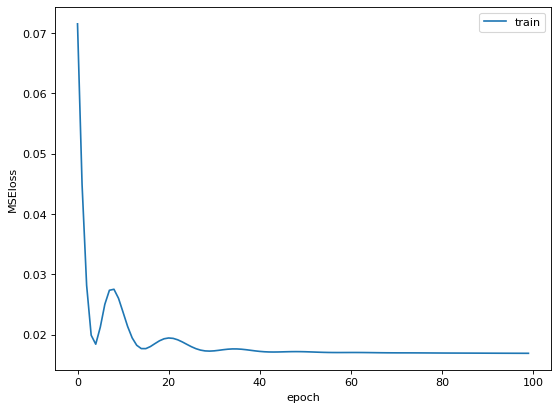

In [175]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), label = 'train')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [176]:
# output = output.detach().numpy()
cnn_train_output = np.zeros([dataset.shape[0], 1])
for i in range(output.shape[0]):
    if output[i][0] >= output[i][1]:
#         print('output[i][0]: %s' % output[i][0])
        cnn_train_output[i + window_size - 1][0] = 1
len(cnn_train_output)
# output

15676

In [177]:
for i in cnn_train_output:
    if i != 0:
        print(i)

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


In [178]:
output = cnn_model(Variable(torch.from_numpy(cnn_test_dataset).float()))
cnn_test_output = np.zeros([test_dataset.shape[0], 1])
for i in range(output.shape[0]):
    # check the following '<='. It used to be '>='
    if output[i][0] <= output[i][1]:
        cnn_test_output[i + window_size - 1][0] = 1
cnn_test_output.shape

(10661, 1)

In [179]:
rnn_train_dataset = np.c_[dataset, cnn_train_output]
for i in rnn_train_dataset:
    if i[1] != 0:
        print(i)

[6.26005826e-04 1.00000000e+00]
[5.96497315e-04 1.00000000e+00]
[8.26243793e-04 1.00000000e+00]
[5.43803169e-04 1.00000000e+00]
[2.67686263e-04 1.00000000e+00]
[3.87828917e-04 1.00000000e+00]
[4.29984445e-04 1.00000000e+00]
[5.35372737e-04 1.00000000e+00]
[5.92281572e-04 1.00000000e+00]
[6.04928589e-04 1.00000000e+00]
[7.46149323e-04 1.00000000e+00]
[7.96735282e-04 1.00000000e+00]
[7.71442302e-04 1.00000000e+00]
[6.61838267e-04 1.00000000e+00]
[6.8080816e-04 1.0000000e+00]
[7.03993795e-04 1.00000000e+00]
[6.68161354e-04 1.00000000e+00]
[9.0844645e-04 1.0000000e+00]
[8.83153471e-04 1.00000000e+00]
[8.64183578e-04 1.00000000e+00]
[8.91584745e-04 1.00000000e+00]
[6.82915715e-04 1.00000000e+00]
[6.78699972e-04 1.00000000e+00]
[5.60665717e-04 1.00000000e+00]
[5.98605502e-04 1.00000000e+00]
[4.97432741e-04 1.00000000e+00]
[4.0679881e-04 1.0000000e+00]
[5.5434263e-04 1.0000000e+00]
[5.37480082e-04 1.00000000e+00]
[6.82915715e-04 1.00000000e+00]
[7.39825393e-04 1.00000000e+00]
[8.49429428e-04 

[0.00978003 1.        ]
[0.00964935 1.        ]
[0.00974842 1.        ]
[0.00968097 1.        ]
[0.00973366 1.        ]
[0.00993179 1.        ]
[0.010014 1.      ]
[0.00980111 1.        ]
[0.00979057 1.        ]
[0.00986224 1.        ]
[0.00987488 1.        ]
[0.00970626 1.        ]
[0.0100414 1.       ]
[0.01000346 1.        ]
[0.01030697 1.        ]
[0.01010463 1.        ]
[0.0104229 1.       ]
[0.01040604 1.        ]
[0.01020791 1.        ]
[0.01033648 1.        ]
[0.01023953 1.        ]
[0.01043766 1.        ]
[0.010503 1.      ]
[0.01066319 1.        ]
[0.01081495 1.        ]
[0.01091823 1.        ]
[0.01099621 1.        ]
[0.01115008 1.        ]
[0.01110582 1.        ]
[0.01137351 1.        ]
[0.01130816 1.        ]
[0.01132713 1.        ]
[0.01112268 1.        ]
[0.01104469 1.        ]
[0.01099411 1.        ]
[0.0106948 1.       ]
[0.01062946 1.        ]
[0.01062103 1.        ]
[0.01065686 1.        ]
[0.01052197 1.        ]
[0.01032805 1.        ]
[0.01016365 1.        ]
[0.009

[0.00405534 1.        ]
[0.00399843 1.        ]
[0.00448954 1.        ]
[0.00441155 1.        ]
[0.00434832 1.        ]
[0.00466027 1.        ]
[0.00457385 1.        ]
[0.00456964 1.        ]
[0.00482889 1.        ]
[0.00475301 1.        ]
[0.00478674 1.        ]
[0.00452537 1.        ]
[0.00415441 1.        ]
[0.00337242 1.        ]
[0.00330919 1.        ]
[0.00351997 1.        ]
[0.00350521 1.        ]
[0.00364011 1.        ]
[0.00373918 1.        ]
[0.0037455 1.       ]
[0.00315532 1.        ]
[0.00317851 1.        ]
[0.00326071 1.        ]
[0.00321434 1.        ]
[0.00313425 1.        ]
[0.00330919 1.        ]
[0.0032565 1.       ]
[0.00315322 1.        ]
[0.0038003 1.       ]
[0.00399843 1.        ]
[0.00423872 1.        ]
[0.00410593 1.        ]
[0.00418392 1.        ]
[0.00418813 1.        ]
[0.00437994 1.        ]
[0.00488369 1.        ]
[0.00563827 1.        ]
[0.00555607 1.        ]
[0.00557082 1.        ]
[0.00617575 1.        ]
[0.00616311 1.        ]
[0.0063254 1.       ]


[0.01368994 1.        ]
[0.01350235 1.        ]
[0.01370891 1.        ]
[0.01337377 1.        ]
[0.01323888 1.        ]
[0.01334848 1.        ]
[0.01367519 1.        ]
[0.01456677 1.        ]
[0.01477755 1.        ]
[0.01454569 1.        ]
[0.01445506 1.        ]
[0.01422953 1.        ]
[0.01407566 1.        ]
[0.01431173 1.        ]
[0.01399556 1.        ]
[0.01409252 1.        ]
[0.01468902 1.        ]
[0.01530238 1.        ]
[0.0150368 1.       ]
[0.01496303 1.        ]
[0.0144403 1.       ]
[0.01462789 1.        ]
[0.0153635 1.       ]
[0.01557639 1.        ]
[0.01527919 1.        ]
[0.01536983 1.        ]
[0.01561011 1.        ]
[0.01538458 1.        ]
[0.0153066 1.       ]
[0.01489769 1.        ]
[0.01476911 1.        ]
[0.01370469 1.        ]
[0.01329368 1.        ]
[0.01331686 1.        ]
[0.01437496 1.        ]
[0.01387121 1.        ]
[0.01295854 1.        ]
[0.01311663 1.        ]
[0.01310609 1.        ]
[0.01296065 1.        ]
[0.01250116 1.        ]
[0.01285948 1.        ]


[0.04419985 1.        ]
[0.04433685 1.        ]
[0.04352326 1.        ]
[0.04384996 1.        ]
[0.04362654 1.        ]
[0.04432843 1.        ]
[0.04604414 1.        ]
[0.04585023 1.        ]
[0.04571322 1.        ]
[0.04645305 1.        ]
[0.04630972 1.        ]
[0.04603782 1.        ]
[0.0464109 1.       ]
[0.04764394 1.        ]
[0.04700739 1.        ]
[0.04725822 1.        ]
[0.04788423 1.        ]
[0.04862194 1.        ]
[0.04851656 1.        ]
[0.04770506 1.        ]
[0.04779781 1.        ]
[0.04781678 1.        ]
[0.04723714 1.        ]
[0.04699264 1.        ]
[0.04660902 1.        ]
[0.04546873 1.        ]
[0.04542657 1.        ]
[0.04555725 1.        ]
[0.04460454 1.        ]
[0.04476895 1.        ]
[0.0451104 1.       ]
[0.04569636 1.        ]
[0.04532329 1.        ]
[0.04562049 1.        ]
[0.04609895 1.        ]
[0.04694627 1.        ]
[0.04750693 1.        ]
[0.04729616 1.        ]
[0.04723714 1.        ]
[0.04680926 1.        ]
[0.04723293 1.        ]
[0.04778516 1.      

[0.07561188 1.        ]
[0.07585427 1.        ]
[0.07575311 1.        ]
[0.07799366 1.        ]
[0.078411 1.      ]
[0.07859648 1.        ]
[0.07844261 1.        ]
[0.07798523 1.        ]
[0.07764799 1.        ]
[0.07728756 1.        ]
[0.07740138 1.        ]
[0.07729177 1.        ]
[0.0770557 1.       ]
[0.07704517 1.        ]
[0.0776796 1.       ]
[0.07780607 1.        ]
[0.07714212 1.        ]
[0.07556762 1.        ]
[0.07615569 1.        ]
[0.07751309 1.        ]
[0.07863442 1.        ]
[0.07750677 1.        ]
[0.07750887 1.        ]
[0.07797469 1.        ]
[0.07698404 1.        ]
[0.07720114 1.        ]
[0.07633274 1.        ]
[0.0768112 1.       ]
[0.07551493 1.        ]
[0.07386876 1.        ]
[0.07487627 1.        ]
[0.07528307 1.        ]
[0.07578051 1.        ]
[0.07657092 1.        ]
[0.07644867 1.        ]
[0.07628005 1.        ]
[0.07720535 1.        ]
[0.07755103 1.        ]
[0.07770489 1.        ]
[0.0772454 1.       ]
[0.07750677 1.        ]
[0.07717374 1.        ]
[0.0

[0.19112799 1.        ]
[0.18853333 1.        ]
[0.19037342 1.        ]
[0.19445616 1.        ]
[0.19380485 1.        ]
[0.19487771 1.        ]
[0.19410415 1.        ]
[0.19635735 1.        ]
[0.19605806 1.        ]
[0.19466904 1.        ]
[0.19340648 1.        ]
[0.18994975 1.        ]
[0.19303762 1.        ]
[0.19251068 1.        ]
[0.19035233 1.        ]
[0.18855652 1.        ]
[0.19001509 1.        ]
[0.18694408 1.        ]
[0.18558879 1.        ]
[0.18994131 1.        ]
[0.19354138 1.        ]
[0.19218609 1.        ]
[0.19051041 1.        ]
[0.18696094 1.        ]
[0.19090878 1.        ]
[0.19166126 1.        ]
[0.19362148 1.        ]
[0.19324419 1.        ]
[0.19671568 1.        ]
[0.19561754 1.        ]
[0.20122841 1.        ]
[0.20052019 1.        ]
[0.20240033 1.        ]
[0.20378091 1.        ]
[0.2048622 1.       ]
[0.20400855 1.        ]
[0.20653575 1.        ]
[0.20573482 1.        ]
[0.20781307 1.        ]
[0.20881637 1.        ]
[0.21017376 1.        ]
[0.21073865 1.    

[0.21649705 1.        ]
[0.21994116 1.        ]
[0.22189715 1.        ]
[0.22192455 1.        ]
[0.2217454 1.       ]
[0.22372459 1.        ]
[0.22428105 1.        ]
[0.22472578 1.        ]
[0.226823 1.      ]
[0.22514522 1.        ]
[0.22580496 1.        ]
[0.22686939 1.        ]
[0.22702747 1.        ]
[0.22261379 1.        ]
[0.22298265 1.        ]
[0.22159364 1.        ]
[0.22297213 1.        ]
[0.22392482 1.        ]
[0.22749117 1.        ]
[0.22826473 1.        ]
[0.22811928 1.        ]
[0.22971487 1.        ]
[0.22731201 1.        ]
[0.2255183 1.       ]
[0.22599255 1.        ]
[0.22545506 1.        ]
[0.22372881 1.        ]
[0.22154517 1.        ]
[0.22258006 1.        ]
[0.2238068 1.       ]
[0.22221964 1.        ]
[0.21975568 1.        ]
[0.22318921 1.        ]
[0.22620544 1.        ]
[0.2266354 1.       ]
[0.22729305 1.        ]
[0.2347988 1.       ]
[0.234529 1.      ]
[0.23435826 1.        ]
[0.23633957 1.        ]
[0.23567772 1.        ]
[0.23989115 1.        ]
[0.2400682

[0.21911491 1.        ]
[0.22017301 1.        ]
[0.21920133 1.        ]
[0.217591 1.      ]
[0.2185732 1.       ]
[0.22155147 1.        ]
[0.2202784 1.       ]
[0.21307615 1.        ]
[0.21977042 1.        ]
[0.22074843 1.        ]
[0.22227445 1.        ]
[0.22278454 1.        ]
[0.22254003 1.        ]
[0.22179809 1.        ]
[0.224163 1.      ]
[0.22481221 1.        ]
[0.23144112 1.        ]
[0.23138843 1.        ]
[0.23149803 1.        ]
[0.23338447 1.        ]
[0.23480722 1.        ]
[0.23472712 1.        ]
[0.23347723 1.        ]
[0.23472293 1.        ]
[0.23648501 1.        ]
[0.23470605 1.        ]
[0.23628476 1.        ]
[0.23823022 1.        ]
[0.23907122 1.        ]
[0.24074269 1.        ]
[0.24136028 1.        ]
[0.24438914 1.        ]
[0.24027055 1.        ]
[0.24375681 1.        ]
[0.24446923 1.        ]
[0.24010825 1.        ]
[0.24240572 1.        ]
[0.23636486 1.        ]
[0.23473556 1.        ]
[0.22678507 1.        ]
[0.23344139 1.        ]
[0.23595807 1.        ]
[0.2

[0.28960492 1.        ]
[0.29712964 1.        ]
[0.29928589 1.        ]
[0.29927113 1.        ]
[0.29898237 1.        ]
[0.30220725 1.        ]
[0.30406841 1.        ]
[0.30578624 1.        ]
[0.30520028 1.        ]
[0.30681483 1.        ]
[0.30557546 1.        ]
[0.30476397 1.        ]
[0.30425811 1.        ]
[0.30754201 1.        ]
[0.30714153 1.        ]
[0.30933361 1.        ]
[0.30933361 1.        ]
[0.31168377 1.        ]
[0.30768112 1.        ]
[0.30567242 1.        ]
[0.30825654 1.        ]
[0.31047391 1.        ]
[0.31449131 1.        ]
[0.3170122 1.       ]
[0.3162239 1.       ]
[0.31665388 1.        ]
[0.31848974 1.        ]
[0.31795648 1.        ]
[0.31481591 1.        ]
[0.31860356 1.        ]
[0.31840965 1.        ]
[0.31974597 1.        ]
[0.31974597 1.        ]
[0.31826632 1.        ]
[0.31647893 1.        ]
[0.31780472 1.        ]
[0.31639252 1.        ]
[0.31845602 1.        ]
[0.31962372 1.        ]
[0.32365377 1.        ]
[0.32484255 1.        ]
[0.32388984 1.      

[0.54591557 1.        ]
[0.54324925 1.        ]
[0.54318601 1.        ]
[0.5448111 1.       ]
[0.54787158 1.        ]
[0.54966107 1.        ]
[0.55052947 1.        ]
[0.55026389 1.        ]
[0.54797907 1.        ]
[0.55299556 1.        ]
[0.5560202 1.       ]
[0.55418855 1.        ]
[0.55372063 1.        ]
[0.5545827 1.       ]
[0.55546797 1.        ]
[0.55721109 1.        ]
[0.56084698 1.        ]
[0.56315077 1.        ]
[0.56718925 1.        ]
[0.57233431 1.        ]
[0.59453119 1.        ]
[0.59045477 1.        ]
[0.58389962 1.        ]
[0.58419049 1.        ]
[0.57118979 1.        ]
[0.55706987 1.        ]
[0.53301183 1.        ]
[0.54113727 1.        ]
[0.54882007 1.        ]
[0.55028286 1.        ]
[0.56467047 1.        ]
[0.56488546 1.        ]
[0.55837458 1.        ]
[0.57487206 1.        ]
[0.56402128 1.        ]
[0.56852347 1.        ]
[0.56905673 1.        ]
[0.5616648 1.       ]
[0.53454207 1.        ]
[0.54935755 1.        ]
[0.53967658 1.        ]
[0.53807047 1.        ]


In [180]:
rnn_train_dataset.shape

(15676, 2)

In [181]:
rnn_test_dataset = np.c_[test_dataset, cnn_test_output]
rnn_test_dataset.shape

(10661, 2)

In [182]:
rnn_seq_len = 28
rnn_input_size = 2
rnn_output_size = window_size # 28
rnn_hidden_size = 16
rnn_num_layers = 1
rnn_learning_rate = 0.001
rnn_num_epochs = 100

In [183]:
rnn_full_data = []
rnn_full_label = []
for i in range(rnn_train_dataset.shape[0] - rnn_seq_len - rnn_output_size + 1):
    rnn_full_data.append(rnn_train_dataset[i: i + rnn_seq_len, ])
    rnn_full_label.append(rnn_train_dataset[i + rnn_seq_len: i + rnn_seq_len + window_size, 0])

rnn_full_data = np.array(rnn_full_data)
rnn_full_label = np.array(rnn_full_label)
rnn_full_label = np.reshape(rnn_full_label, (rnn_full_label.shape[0], 1, rnn_full_label.shape[1]))
print("rnn_full_data: ", rnn_full_data.shape)
print("rnn_full_label: ", rnn_full_label.shape)

rnn_full_data:  (15621, 28, 2)
rnn_full_label:  (15621, 1, 28)


In [184]:
rnn_test_data = []
rnn_test_date = []
for i in range(rnn_test_dataset.shape[0] - rnn_seq_len - rnn_output_size + 1):
    rnn_test_data.append(rnn_test_dataset[i: i + rnn_seq_len, ])
    rnn_test_date.append(test_date[i + rnn_seq_len])
rnn_test_data = np.array(rnn_test_data)
rnn_test_date = np.array(rnn_test_date)
rnn_test_date.shape

(10606, 1)

In [185]:
rnn_model = RNN(rnn_input_size, rnn_output_size, rnn_hidden_size, rnn_num_layers)
rnn_model

RNN(
  (rnn): GRU(2, 16, batch_first=True)
  (linear): Linear(in_features=16, out_features=28, bias=True)
)

In [186]:
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=rnn_learning_rate)
criterion = nn.MSELoss()

loss_arr = []
# loss_val_arr = []

for epoch in range(rnn_num_epochs):
    # make training sets in torch
    inputs = Variable(torch.from_numpy(rnn_full_data).float())
    labels = Variable(torch.from_numpy(rnn_full_label).float())

    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output, hidden = rnn_model(inputs)   
    
    # Compute loss
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_arr.append(loss.item())

    # Backward pass
    loss.backward(retain_graph=True)

    if (epoch % 10 == 0 or epoch == rnn_num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, rnn_num_epochs, loss.item()))

    # Update parameters
    optimizer.step()

[0/100] Loss: 0.1458
[10/100] Loss: 0.1145
[20/100] Loss: 0.0912
[30/100] Loss: 0.0730
[40/100] Loss: 0.0584
[50/100] Loss: 0.0471
[60/100] Loss: 0.0387
[70/100] Loss: 0.0325
[80/100] Loss: 0.0280
[90/100] Loss: 0.0244
[99/100] Loss: 0.0213


<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

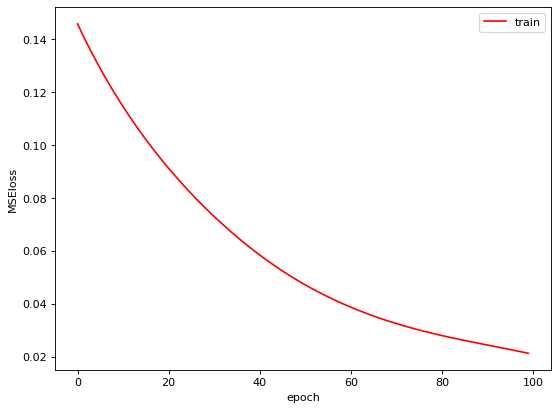

In [187]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), 'r', label = 'train')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [188]:
test_output, hidden = rnn_model(Variable(torch.from_numpy(rnn_test_data).float()))

rnn_test_price_differences = []
for idx_window, prices_28_list in enumerate(test_output):
    print('working on %s' % idx_window)
    price_differences = []
    for idx, price in enumerate(prices_28_list):
        if idx != 0:
            difference = prices_28_list[idx - 1] - float(price)
            if difference < 0:
                price_differences.append(-1)
            else:
                price_differences.append(1)
    rnn_test_price_differences.append(price_differences)
    

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 681
working on 682
working on 683
working on 684
working on 685
working on 686
working on 687
working on 688
working on 689
working on 690
working on 691
working on 692
working on 693
working on 694
working on 695
working on 696
working on 697
working on 698
working on 699
working on 700
working on 701
working on 702
working on 703
working on 704
working on 705
working on 706
working on 707
working on 708
working on 709
working on 710
working on 711
working on 712
working on 713
working on 714
working on 715
working on 716
working on 717
working on 718
working on 719
working on 720
working on 721
working on 722
working on 723
working on 724
working on 725
working on 726
working on 727
working on 728
working on 729
working on 730
working on 731
working on 732
working on 733
working on 734
working on 735
working on 736
working on 737
working on 738
working on 739
working on 740
working on 741
working on 742
working on 743
working on 744
working on 745
working on 746
working on

working on 1346
working on 1347
working on 1348
working on 1349
working on 1350
working on 1351
working on 1352
working on 1353
working on 1354
working on 1355
working on 1356
working on 1357
working on 1358
working on 1359
working on 1360
working on 1361
working on 1362
working on 1363
working on 1364
working on 1365
working on 1366
working on 1367
working on 1368
working on 1369
working on 1370
working on 1371
working on 1372
working on 1373
working on 1374
working on 1375
working on 1376
working on 1377
working on 1378
working on 1379
working on 1380
working on 1381
working on 1382
working on 1383
working on 1384
working on 1385
working on 1386
working on 1387
working on 1388
working on 1389
working on 1390
working on 1391
working on 1392
working on 1393
working on 1394
working on 1395
working on 1396
working on 1397
working on 1398
working on 1399
working on 1400
working on 1401
working on 1402
working on 1403
working on 1404
working on 1405
working on 1406
working on 1407
working 

working on 2004
working on 2005
working on 2006
working on 2007
working on 2008
working on 2009
working on 2010
working on 2011
working on 2012
working on 2013
working on 2014
working on 2015
working on 2016
working on 2017
working on 2018
working on 2019
working on 2020
working on 2021
working on 2022
working on 2023
working on 2024
working on 2025
working on 2026
working on 2027
working on 2028
working on 2029
working on 2030
working on 2031
working on 2032
working on 2033
working on 2034
working on 2035
working on 2036
working on 2037
working on 2038
working on 2039
working on 2040
working on 2041
working on 2042
working on 2043
working on 2044
working on 2045
working on 2046
working on 2047
working on 2048
working on 2049
working on 2050
working on 2051
working on 2052
working on 2053
working on 2054
working on 2055
working on 2056
working on 2057
working on 2058
working on 2059
working on 2060
working on 2061
working on 2062
working on 2063
working on 2064
working on 2065
working 

working on 2650
working on 2651
working on 2652
working on 2653
working on 2654
working on 2655
working on 2656
working on 2657
working on 2658
working on 2659
working on 2660
working on 2661
working on 2662
working on 2663
working on 2664
working on 2665
working on 2666
working on 2667
working on 2668
working on 2669
working on 2670
working on 2671
working on 2672
working on 2673
working on 2674
working on 2675
working on 2676
working on 2677
working on 2678
working on 2679
working on 2680
working on 2681
working on 2682
working on 2683
working on 2684
working on 2685
working on 2686
working on 2687
working on 2688
working on 2689
working on 2690
working on 2691
working on 2692
working on 2693
working on 2694
working on 2695
working on 2696
working on 2697
working on 2698
working on 2699
working on 2700
working on 2701
working on 2702
working on 2703
working on 2704
working on 2705
working on 2706
working on 2707
working on 2708
working on 2709
working on 2710
working on 2711
working 

working on 3309
working on 3310
working on 3311
working on 3312
working on 3313
working on 3314
working on 3315
working on 3316
working on 3317
working on 3318
working on 3319
working on 3320
working on 3321
working on 3322
working on 3323
working on 3324
working on 3325
working on 3326
working on 3327
working on 3328
working on 3329
working on 3330
working on 3331
working on 3332
working on 3333
working on 3334
working on 3335
working on 3336
working on 3337
working on 3338
working on 3339
working on 3340
working on 3341
working on 3342
working on 3343
working on 3344
working on 3345
working on 3346
working on 3347
working on 3348
working on 3349
working on 3350
working on 3351
working on 3352
working on 3353
working on 3354
working on 3355
working on 3356
working on 3357
working on 3358
working on 3359
working on 3360
working on 3361
working on 3362
working on 3363
working on 3364
working on 3365
working on 3366
working on 3367
working on 3368
working on 3369
working on 3370
working 

working on 3918
working on 3919
working on 3920
working on 3921
working on 3922
working on 3923
working on 3924
working on 3925
working on 3926
working on 3927
working on 3928
working on 3929
working on 3930
working on 3931
working on 3932
working on 3933
working on 3934
working on 3935
working on 3936
working on 3937
working on 3938
working on 3939
working on 3940
working on 3941
working on 3942
working on 3943
working on 3944
working on 3945
working on 3946
working on 3947
working on 3948
working on 3949
working on 3950
working on 3951
working on 3952
working on 3953
working on 3954
working on 3955
working on 3956
working on 3957
working on 3958
working on 3959
working on 3960
working on 3961
working on 3962
working on 3963
working on 3964
working on 3965
working on 3966
working on 3967
working on 3968
working on 3969
working on 3970
working on 3971
working on 3972
working on 3973
working on 3974
working on 3975
working on 3976
working on 3977
working on 3978
working on 3979
working 

working on 4531
working on 4532
working on 4533
working on 4534
working on 4535
working on 4536
working on 4537
working on 4538
working on 4539
working on 4540
working on 4541
working on 4542
working on 4543
working on 4544
working on 4545
working on 4546
working on 4547
working on 4548
working on 4549
working on 4550
working on 4551
working on 4552
working on 4553
working on 4554
working on 4555
working on 4556
working on 4557
working on 4558
working on 4559
working on 4560
working on 4561
working on 4562
working on 4563
working on 4564
working on 4565
working on 4566
working on 4567
working on 4568
working on 4569
working on 4570
working on 4571
working on 4572
working on 4573
working on 4574
working on 4575
working on 4576
working on 4577
working on 4578
working on 4579
working on 4580
working on 4581
working on 4582
working on 4583
working on 4584
working on 4585
working on 4586
working on 4587
working on 4588
working on 4589
working on 4590
working on 4591
working on 4592
working 

working on 5162
working on 5163
working on 5164
working on 5165
working on 5166
working on 5167
working on 5168
working on 5169
working on 5170
working on 5171
working on 5172
working on 5173
working on 5174
working on 5175
working on 5176
working on 5177
working on 5178
working on 5179
working on 5180
working on 5181
working on 5182
working on 5183
working on 5184
working on 5185
working on 5186
working on 5187
working on 5188
working on 5189
working on 5190
working on 5191
working on 5192
working on 5193
working on 5194
working on 5195
working on 5196
working on 5197
working on 5198
working on 5199
working on 5200
working on 5201
working on 5202
working on 5203
working on 5204
working on 5205
working on 5206
working on 5207
working on 5208
working on 5209
working on 5210
working on 5211
working on 5212
working on 5213
working on 5214
working on 5215
working on 5216
working on 5217
working on 5218
working on 5219
working on 5220
working on 5221
working on 5222
working on 5223
working 

working on 5754
working on 5755
working on 5756
working on 5757
working on 5758
working on 5759
working on 5760
working on 5761
working on 5762
working on 5763
working on 5764
working on 5765
working on 5766
working on 5767
working on 5768
working on 5769
working on 5770
working on 5771
working on 5772
working on 5773
working on 5774
working on 5775
working on 5776
working on 5777
working on 5778
working on 5779
working on 5780
working on 5781
working on 5782
working on 5783
working on 5784
working on 5785
working on 5786
working on 5787
working on 5788
working on 5789
working on 5790
working on 5791
working on 5792
working on 5793
working on 5794
working on 5795
working on 5796
working on 5797
working on 5798
working on 5799
working on 5800
working on 5801
working on 5802
working on 5803
working on 5804
working on 5805
working on 5806
working on 5807
working on 5808
working on 5809
working on 5810
working on 5811
working on 5812
working on 5813
working on 5814
working on 5815
working 

working on 6411
working on 6412
working on 6413
working on 6414
working on 6415
working on 6416
working on 6417
working on 6418
working on 6419
working on 6420
working on 6421
working on 6422
working on 6423
working on 6424
working on 6425
working on 6426
working on 6427
working on 6428
working on 6429
working on 6430
working on 6431
working on 6432
working on 6433
working on 6434
working on 6435
working on 6436
working on 6437
working on 6438
working on 6439
working on 6440
working on 6441
working on 6442
working on 6443
working on 6444
working on 6445
working on 6446
working on 6447
working on 6448
working on 6449
working on 6450
working on 6451
working on 6452
working on 6453
working on 6454
working on 6455
working on 6456
working on 6457
working on 6458
working on 6459
working on 6460
working on 6461
working on 6462
working on 6463
working on 6464
working on 6465
working on 6466
working on 6467
working on 6468
working on 6469
working on 6470
working on 6471
working on 6472
working 

working on 6966
working on 6967
working on 6968
working on 6969
working on 6970
working on 6971
working on 6972
working on 6973
working on 6974
working on 6975
working on 6976
working on 6977
working on 6978
working on 6979
working on 6980
working on 6981
working on 6982
working on 6983
working on 6984
working on 6985
working on 6986
working on 6987
working on 6988
working on 6989
working on 6990
working on 6991
working on 6992
working on 6993
working on 6994
working on 6995
working on 6996
working on 6997
working on 6998
working on 6999
working on 7000
working on 7001
working on 7002
working on 7003
working on 7004
working on 7005
working on 7006
working on 7007
working on 7008
working on 7009
working on 7010
working on 7011
working on 7012
working on 7013
working on 7014
working on 7015
working on 7016
working on 7017
working on 7018
working on 7019
working on 7020
working on 7021
working on 7022
working on 7023
working on 7024
working on 7025
working on 7026
working on 7027
working 

working on 7566
working on 7567
working on 7568
working on 7569
working on 7570
working on 7571
working on 7572
working on 7573
working on 7574
working on 7575
working on 7576
working on 7577
working on 7578
working on 7579
working on 7580
working on 7581
working on 7582
working on 7583
working on 7584
working on 7585
working on 7586
working on 7587
working on 7588
working on 7589
working on 7590
working on 7591
working on 7592
working on 7593
working on 7594
working on 7595
working on 7596
working on 7597
working on 7598
working on 7599
working on 7600
working on 7601
working on 7602
working on 7603
working on 7604
working on 7605
working on 7606
working on 7607
working on 7608
working on 7609
working on 7610
working on 7611
working on 7612
working on 7613
working on 7614
working on 7615
working on 7616
working on 7617
working on 7618
working on 7619
working on 7620
working on 7621
working on 7622
working on 7623
working on 7624
working on 7625
working on 7626
working on 7627
working 

working on 8173
working on 8174
working on 8175
working on 8176
working on 8177
working on 8178
working on 8179
working on 8180
working on 8181
working on 8182
working on 8183
working on 8184
working on 8185
working on 8186
working on 8187
working on 8188
working on 8189
working on 8190
working on 8191
working on 8192
working on 8193
working on 8194
working on 8195
working on 8196
working on 8197
working on 8198
working on 8199
working on 8200
working on 8201
working on 8202
working on 8203
working on 8204
working on 8205
working on 8206
working on 8207
working on 8208
working on 8209
working on 8210
working on 8211
working on 8212
working on 8213
working on 8214
working on 8215
working on 8216
working on 8217
working on 8218
working on 8219
working on 8220
working on 8221
working on 8222
working on 8223
working on 8224
working on 8225
working on 8226
working on 8227
working on 8228
working on 8229
working on 8230
working on 8231
working on 8232
working on 8233
working on 8234
working 

working on 8780
working on 8781
working on 8782
working on 8783
working on 8784
working on 8785
working on 8786
working on 8787
working on 8788
working on 8789
working on 8790
working on 8791
working on 8792
working on 8793
working on 8794
working on 8795
working on 8796
working on 8797
working on 8798
working on 8799
working on 8800
working on 8801
working on 8802
working on 8803
working on 8804
working on 8805
working on 8806
working on 8807
working on 8808
working on 8809
working on 8810
working on 8811
working on 8812
working on 8813
working on 8814
working on 8815
working on 8816
working on 8817
working on 8818
working on 8819
working on 8820
working on 8821
working on 8822
working on 8823
working on 8824
working on 8825
working on 8826
working on 8827
working on 8828
working on 8829
working on 8830
working on 8831
working on 8832
working on 8833
working on 8834
working on 8835
working on 8836
working on 8837
working on 8838
working on 8839
working on 8840
working on 8841
working 

working on 9367
working on 9368
working on 9369
working on 9370
working on 9371
working on 9372
working on 9373
working on 9374
working on 9375
working on 9376
working on 9377
working on 9378
working on 9379
working on 9380
working on 9381
working on 9382
working on 9383
working on 9384
working on 9385
working on 9386
working on 9387
working on 9388
working on 9389
working on 9390
working on 9391
working on 9392
working on 9393
working on 9394
working on 9395
working on 9396
working on 9397
working on 9398
working on 9399
working on 9400
working on 9401
working on 9402
working on 9403
working on 9404
working on 9405
working on 9406
working on 9407
working on 9408
working on 9409
working on 9410
working on 9411
working on 9412
working on 9413
working on 9414
working on 9415
working on 9416
working on 9417
working on 9418
working on 9419
working on 9420
working on 9421
working on 9422
working on 9423
working on 9424
working on 9425
working on 9426
working on 9427
working on 9428
working 

working on 9965
working on 9966
working on 9967
working on 9968
working on 9969
working on 9970
working on 9971
working on 9972
working on 9973
working on 9974
working on 9975
working on 9976
working on 9977
working on 9978
working on 9979
working on 9980
working on 9981
working on 9982
working on 9983
working on 9984
working on 9985
working on 9986
working on 9987
working on 9988
working on 9989
working on 9990
working on 9991
working on 9992
working on 9993
working on 9994
working on 9995
working on 9996
working on 9997
working on 9998
working on 9999
working on 10000
working on 10001
working on 10002
working on 10003
working on 10004
working on 10005
working on 10006
working on 10007
working on 10008
working on 10009
working on 10010
working on 10011
working on 10012
working on 10013
working on 10014
working on 10015
working on 10016
working on 10017
working on 10018
working on 10019
working on 10020
working on 10021
working on 10022
working on 10023
working on 10024
working on 1002

working on 10569
working on 10570
working on 10571
working on 10572
working on 10573
working on 10574
working on 10575
working on 10576
working on 10577
working on 10578
working on 10579
working on 10580
working on 10581
working on 10582
working on 10583
working on 10584
working on 10585
working on 10586
working on 10587
working on 10588
working on 10589
working on 10590
working on 10591
working on 10592
working on 10593
working on 10594
working on 10595
working on 10596
working on 10597
working on 10598
working on 10599
working on 10600
working on 10601
working on 10602
working on 10603
working on 10604
working on 10605


In [189]:
rnn_test_price_differences = np.array(rnn_test_price_differences).reshape((10606, 1, 27))
final_cnn_output = cnn_model(Variable(torch.from_numpy(rnn_test_price_differences).float()))
window_idxes_buy = []
for window_idx, i in enumerate(final_cnn_output):
    # Change '>=' to '<=' as right now we are finding buy signal
    if float(final_cnn_output[window_idx][0]) <= float(final_cnn_output[window_idx][1]):
        window_idxes_buy.append(window_idx)
window_idxes_buy

[10,
 11,
 12,
 13,
 14,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 97,
 98,
 99,
 100,
 101,
 103,
 104,
 105,
 106,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 123,
 124,
 125,
 126,
 127,
 129,
 130,
 131,
 132,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 201,
 202,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 

In [191]:
total_profit_buy = 0
total_profit_records_buy = []
for window_idx in window_idxes_buy:
    try:
        # if buy signal exists 
        max_arg = torch.argmax(test_output[window_idx])
        min_arg = torch.argmin(test_output[window_idx])
        actural_selling_record = data.loc[(  data['Date'] == str(rnn_test_date[window_idx+max_arg][0]).replace('T00:00:00.000000000', ''))]
        actural_buying_record = data.loc[(  data['Date'] == str(rnn_test_date[window_idx+min_arg][0]).replace('T00:00:00.000000000', ''))]
        actural_selling_price = actural_selling_record['Close'].values
        actural_buying_price = actural_buying_record['Close'].values
        day_trade_profit = actural_selling_price - actural_buying_price
        total_profit_buy += day_trade_profit
        total_profit_records_buy.append(total_profit_buy[0])
    except:
        print('window_idx: %s' % window_idx)
        print('max_arg: %s' % max_arg)
        print('min_arg: %s' % min_arg)
total_profit_buy

window_idx: 10583
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10584
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10585
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10586
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10587
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10588
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10589
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10590
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10591
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10592
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10593
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10594
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10595
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10596
max_arg: tensor(23)
min_arg: tensor(5)
window_idx: 10599
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10600
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10601
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 106

array([17496.188714])

In [126]:
initial_price = None
profit = 0
sell_point_array = []
buy_point_price_array = []
sell_point_date_array = []
label_set = np.zeros([len(corr_array), 1])

for i in range(len(corr_array)):
    if (corr_array[i] >= 0.9 and corr_array[i] <= 1):
        sell_point_array.append(corr_array[i])
        local_data = data.loc[(  data['Date'] >= str(corr_date_array[i - window_size + 1]).replace('T00:00:00.000000000', ''))]
        local_data = local_data.loc[( str(corr_date_array[i]).replace('T00:00:00.000000000', '') >= local_data['Date'] )]
        local_data = local_data['Close'].values
        buy_point_price = np.amin(local_data)
        if not initial_price:
            initial_price = buy_point_price
            share_amount = int(1000000 / initial_price)
            print('share_amount: %s' % share_amount)
        sell_point_date_array.append(corr_date_array[i])
        sell_point_data = data.loc[(  data['Date'] == str(corr_date_array[i]).replace('T00:00:00.000000000', ''))]
        sell_point_close_price_data = sell_point_data['Close'].values
        label_set[i] = 1
        profit += sell_point_close_price_data - buy_point_price
print(len(sell_point_date_array))
print('total profit: %s' % str(profit*share_amount))

share_amount: 14727
268
total profit: [1.34433798e+08]


In [127]:
cnn_model = CNN()
cnn_learning_rate = 0.001
cnn_num_epochs = 100
cnn_model

CNN(
  (conv1): Conv1d(1, 10, kernel_size=(3,), stride=(1,), padding=(1,))
  (activate1): ReLU()
  (max_pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(10, 20, kernel_size=(3,), stride=(1,))
  (activate2): ReLU()
  (max_pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(20, 40, kernel_size=(3,), stride=(1,))
  (linear): Linear(in_features=120, out_features=2, bias=True)
  (activate3): Softmax(dim=None)
)

In [128]:
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=cnn_learning_rate)
criterion = nn.MSELoss()
loss_arr = []

for epoch in range(cnn_num_epochs):
    # make training sets in torch
#     cnn_full_dataset = total_day_price_array
    cnn_full_dataset = np.array(all_price_differences).reshape((15649, 1, 27))
    inputs = Variable(torch.from_numpy(cnn_full_dataset).float())
    labels = Variable(torch.from_numpy(label_set).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output = cnn_model(inputs)

#     print("output:", output.shape)
#     print("labels:", labels.shape)
    # Compute loss
    loss = criterion(output, labels)
    loss_arr.append(loss.item())
       
    # Backward pass
    loss.backward(retain_graph=True)
    
    if (epoch % 10 == 0 or epoch == cnn_num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, cnn_num_epochs, loss.item()))
    
    # Update parameters
    optimizer.step()                                

[0/100] Loss: 0.0325
[10/100] Loss: 0.0179
[20/100] Loss: 0.0172
[30/100] Loss: 0.0170
[40/100] Loss: 0.0169
[50/100] Loss: 0.0168
[60/100] Loss: 0.0167
[70/100] Loss: 0.0167
[80/100] Loss: 0.0166
[90/100] Loss: 0.0166
[99/100] Loss: 0.0166


In [129]:
cnn_train_output = np.zeros([dataset.shape[0], 1])
for i in range(output.shape[0]):
    if output[i][0] >= output[i][1]:
        cnn_train_output[i + window_size - 1][0] = 1
len(cnn_train_output)

15676

In [130]:
all_price_differences = np.array(all_price_differences)
all_price_differences = all_price_differences.reshape((15649, 1, 27))
all_price_differences.shape

(15649, 1, 27)

In [131]:
output = cnn_model(Variable(torch.from_numpy(cnn_test_dataset).float()))
cnn_test_output = np.zeros([test_dataset.shape[0], 1])
for i in range(output.shape[0]):
    if output[i][0] >= output[i][1]:
        cnn_test_output[i + window_size - 1][0] = 1
cnn_test_output.shape

(10661, 1)

In [132]:
rnn_train_dataset = np.c_[dataset, cnn_train_output]
for i in rnn_train_dataset:
    if i[1] != 0:
        print(i)

[6.28114013e-04 1.00000000e+00]
[5.3326455e-04 1.0000000e+00]
[5.96497315e-04 1.00000000e+00]
[7.58795286e-04 1.00000000e+00]
[8.51537615e-04 1.00000000e+00]
[7.46149323e-04 1.00000000e+00]
[8.26243793e-04 1.00000000e+00]
[7.208555e-04 1.000000e+00]
[2.67686263e-04 1.00000000e+00]
[3.87828917e-04 1.00000000e+00]
[3.43566045e-04 1.00000000e+00]
[4.4684615e-04 1.0000000e+00]
[5.98605502e-04 1.00000000e+00]
[5.81742954e-04 1.00000000e+00]
[5.92281572e-04 1.00000000e+00]
[6.04928589e-04 1.00000000e+00]
[6.51299649e-04 1.00000000e+00]
[7.96735282e-04 1.00000000e+00]
[6.61838267e-04 1.00000000e+00]
[6.8080816e-04 1.0000000e+00]
[7.03993795e-04 1.00000000e+00]
[6.68161354e-04 1.00000000e+00]
[9.10554638e-04 1.00000000e+00]
[8.36782411e-04 1.00000000e+00]
[8.91584745e-04 1.00000000e+00]
[8.2835198e-04 1.0000000e+00]
[6.82915715e-04 1.00000000e+00]
[5.60665717e-04 1.00000000e+00]
[4.97432741e-04 1.00000000e+00]
[4.0679881e-04 1.0000000e+00]
[5.5434263e-04 1.0000000e+00]
[4.99540296e-04 1.000000

[0.00919407 1.        ]
[0.00913927 1.        ]
[0.00907182 1.        ]
[0.0087388 1.       ]
[0.00863552 1.        ]
[0.0085765 1.       ]
[0.00850694 1.        ]
[0.00844582 1.        ]
[0.00836151 1.        ]
[0.00836783 1.        ]
[0.00840155 1.        ]
[0.00815705 1.        ]
[0.00793785 1.        ]
[0.00799686 1.        ]
[0.00815495 1.        ]
[0.00777976 1.        ]
[0.00748678 1.        ]
[0.00777766 1.        ]
[0.0077629 1.       ]
[0.00801583 1.        ]
[0.00761325 1.        ]
[0.00788094 1.        ]
[0.00775236 1.        ]
[0.00789569 1.        ]
[0.00800951 1.        ]
[0.0085238 1.       ]
[0.00869875 1.        ]
[0.00877674 1.        ]
[0.0090107 1.       ]
[0.00935637 1.        ]
[0.0093627 1.       ]
[0.00940274 1.        ]
[0.00945965 1.        ]
[0.00942593 1.        ]
[0.0093627 1.       ]
[0.00948705 1.        ]
[0.00964724 1.        ]
[0.00977792 1.        ]
[0.00979268 1.        ]
[0.00972734 1.        ]
[0.00984327 1.        ]
[0.00984537 1.        ]
[0.009

[0.00440102 1.        ]
[0.00475301 1.        ]
[0.00478674 1.        ]
[0.00483732 1.        ]
[0.00452537 1.        ]
[0.00445792 1.        ]
[0.0043968 1.       ]
[0.00415441 1.        ]
[0.00359796 1.        ]
[0.00364011 1.        ]
[0.00373918 1.        ]
[0.00293612 1.        ]
[0.00270005 1.        ]
[0.00317851 1.        ]
[0.00326071 1.        ]
[0.00313425 1.        ]
[0.00324174 1.        ]
[0.0032565 1.       ]
[0.00310052 1.        ]
[0.003149 1.      ]
[0.00315322 1.        ]
[0.00390147 1.        ]
[0.00396681 1.        ]
[0.00430195 1.        ]
[0.00397946 1.        ]
[0.00411857 1.        ]
[0.00418813 1.        ]
[0.00437994 1.        ]
[0.00488369 1.        ]
[0.00522304 1.        ]
[0.0054001 1.       ]
[0.00535583 1.        ]
[0.00563827 1.        ]
[0.00555607 1.        ]
[0.00557082 1.        ]
[0.00556029 1.        ]
[0.00607247 1.        ]
[0.00605561 1.        ]
[0.0063254 1.       ]
[0.00576052 1.        ]
[0.00593758 1.        ]
[0.00660995 1.        ]
[0.0

[0.01387121 1.        ]
[0.0135972 1.       ]
[0.01341382 1.        ]
[0.01321358 1.        ]
[0.01321358 1.        ]
[0.01319251 1.        ]
[0.0131103 1.       ]
[0.0128384 1.       ]
[0.01274355 1.        ]
[0.01257915 1.        ]
[0.01253699 1.        ]
[0.01257493 1.        ]
[0.01220186 1.        ]
[0.01220818 1.        ]
[0.0121049 1.       ]
[0.01197 1.     ]
[0.01210068 1.        ]
[0.01217446 1.        ]
[0.01211755 1.        ]
[0.01194471 1.        ]
[0.01221239 1.        ]
[0.01200162 1.        ]
[0.01222715 1.        ]
[0.01210068 1.        ]
[0.01161168 1.        ]
[0.01166227 1.        ]
[0.01193628 1.        ]
[0.01209225 1.        ]
[0.01206696 1.        ]
[0.01227563 1.        ]
[0.01240842 1.        ]
[0.01233675 1.        ]
[0.01248219 1.        ]
[0.01206274 1.        ]
[0.01170653 1.        ]
[0.01170232 1.        ]
[0.01196789 1.        ]
[0.0117255 1.       ]
[0.01116273 1.        ]
[0.0105852 1.       ]
[0.01088661 1.        ]
[0.0109372 1.       ]
[0.01198054 

[0.068886 1.      ]
[0.06915369 1.        ]
[0.06926118 1.        ]
[0.06910942 1.        ]
[0.06852768 1.        ]
[0.06877851 1.        ]
[0.06819465 1.        ]
[0.06840965 1.        ]
[0.06668339 1.        ]
[0.06748856 1.        ]
[0.06811245 1.        ]
[0.07055957 1.        ]
[0.0711645 1.       ]
[0.07079142 1.        ]
[0.07072397 1.        ]
[0.06897242 1.        ]
[0.06931388 1.        ]
[0.06838646 1.        ]
[0.06957524 1.        ]
[0.06879537 1.        ]
[0.06861832 1.        ]
[0.0671218 1.       ]
[0.0672293 1.       ]
[0.06827264 1.        ]
[0.06959632 1.        ]
[0.06934128 1.        ]
[0.07022443 1.        ]
[0.0696996 1.       ]
[0.06897032 1.        ]
[0.06880591 1.        ]
[0.06929491 1.        ]
[0.06975651 1.        ]
[0.07060594 1.        ]
[0.07133101 1.        ]
[0.07131836 1.        ]
[0.07059329 1.        ]
[0.07078299 1.        ]
[0.07105911 1.        ]
[0.0702687 1.       ]
[0.06897242 1.        ]
[0.07201182 1.        ]
[0.07259989 1.        ]
[0.072

[0.27373767 1.        ]
[0.27203457 1.        ]
[0.27042215 1.        ]
[0.27452175 1.        ]
[0.26975187 1.        ]
[0.27249197 1.        ]
[0.27150133 1.        ]
[0.27472831 1.        ]
[0.2772471 1.       ]
[0.27133059 1.        ]
[0.26440869 1.        ]
[0.25971891 1.        ]
[0.26401032 1.        ]
[0.26339484 1.        ]
[0.26291007 1.        ]
[0.26325153 1.        ]
[0.27056969 1.        ]
[0.26997531 1.        ]
[0.26623402 1.        ]
[0.27385147 1.        ]
[0.27833258 1.        ]
[0.28007149 1.        ]
[0.28223406 1.        ]
[0.28321206 1.        ]
[0.28477603 1.        ]
[0.28389498 1.        ]
[0.28272729 1.        ]
[0.28369897 1.        ]
[0.28611235 1.        ]
[0.28804307 1.        ]
[0.28569713 1.        ]
[0.27925789 1.        ]
[0.27500863 1.        ]
[0.27625222 1.        ]
[0.27165519 1.        ]
[0.26906052 1.        ]
[0.26891932 1.        ]
[0.26413045 1.        ]
[0.26306816 1.        ]
[0.26254332 1.        ]
[0.25909291 1.        ]
[0.2626192 1.     

[0.27374189 1.        ]
[0.2709765 1.       ]
[0.25845003 1.        ]
[0.25879149 1.        ]
[0.25489634 1.        ]
[0.25025293 1.        ]
[0.24789435 1.        ]
[0.24507205 1.        ]
[0.25300357 1.        ]
[0.25525043 1.        ]
[0.25613149 1.        ]
[0.257002 1.      ]
[0.26315036 1.        ]
[0.25938798 1.        ]
[0.2582814 1.       ]
[0.25773339 1.        ]
[0.24969226 1.        ]
[0.2470955 1.       ]
[0.24479592 1.        ]
[0.23944641 1.        ]
[0.24472637 1.        ]
[0.23483884 1.        ]
[0.2238616 1.       ]
[0.1993546 1.       ]
[0.18848274 1.        ]
[0.19669671 1.        ]
[0.19029964 1.        ]
[0.17801769 1.        ]
[0.18040578 1.        ]
[0.16792992 1.        ]
[0.19318728 1.        ]
[0.19267087 1.        ]
[0.20098601 1.        ]
[0.1475942 1.       ]
[0.15762506 1.        ]
[0.1697152 1.       ]
[0.17790387 1.        ]
[0.18074092 1.        ]
[0.17630829 1.        ]
[0.17312978 1.        ]
[0.18147442 1.        ]
[0.17614178 1.        ]
[0.1727166

[0.5033661 1.       ]
[0.50285391 1.        ]
[0.50170307 1.        ]
[0.50184851 1.        ]
[0.50266632 1.        ]
[0.50236702 1.        ]
[0.50293401 1.        ]
[0.50309631 1.        ]
[0.49894612 1.        ]
[0.50343777 1.        ]
[0.49901357 1.        ]
[0.5009759 1.       ]
[0.50171994 1.        ]
[0.49691634 1.        ]
[0.51034281 1.        ]
[0.51111846 1.        ]
[0.51005826 1.        ]
[0.51095406 1.        ]
[0.50921726 1.        ]
[0.50699989 1.        ]
[0.51099621 1.        ]
[0.50867556 1.        ]
[0.50858282 1.        ]
[0.50780927 1.        ]
[0.51343279 1.        ]
[0.51559536 1.        ]
[0.51501572 1.        ]
[0.5159874 1.       ]
[0.51734059 1.        ]
[0.51767572 1.        ]
[0.51606539 1.        ]
[0.51640685 1.        ]
[0.51527287 1.        ]
[0.51742279 1.        ]
[0.51805934 1.        ]
[0.52001956 1.        ]
[0.52207674 1.        ]
[0.52322758 1.        ]
[0.52691406 1.        ]
[0.52536696 1.        ]
[0.52661265 1.        ]
[0.52758222 1.        

In [133]:
rnn_test_dataset = np.c_[test_dataset, cnn_test_output]
rnn_test_dataset.shape

(10661, 2)

In [134]:
rnn_seq_len = 28
rnn_input_size = 2
rnn_output_size = window_size # 28
rnn_hidden_size = 16
rnn_num_layers = 1
rnn_learning_rate = 0.001
rnn_num_epochs = 100

In [135]:
rnn_full_data = []
rnn_full_label = []
for i in range(rnn_train_dataset.shape[0] - rnn_seq_len - rnn_output_size + 1):
    rnn_full_data.append(rnn_train_dataset[i: i + rnn_seq_len, ])
    rnn_full_label.append(rnn_train_dataset[i + rnn_seq_len: i + rnn_seq_len + window_size, 0])
#     date_list.append(date[i + seq_len])
rnn_full_data = np.array(rnn_full_data)
rnn_full_label = np.array(rnn_full_label)
rnn_full_label = np.reshape(rnn_full_label, (rnn_full_label.shape[0], 1, rnn_full_label.shape[1]))
print("rnn_full_data: ", rnn_full_data.shape)
print("rnn_full_label: ", rnn_full_label.shape)

rnn_full_data:  (15621, 28, 2)
rnn_full_label:  (15621, 1, 28)


In [136]:
rnn_test_data = []
rnn_test_date = []
for i in range(rnn_test_dataset.shape[0] - rnn_seq_len - rnn_output_size + 1):
    rnn_test_data.append(rnn_test_dataset[i: i + rnn_seq_len, ])
    rnn_test_date.append(test_date[i + rnn_seq_len])
rnn_test_data = np.array(rnn_test_data)
rnn_test_date = np.array(rnn_test_date)
rnn_test_date.shape

(10606, 1)

In [137]:
rnn_model = RNN(rnn_input_size, rnn_output_size, rnn_hidden_size, rnn_num_layers)
rnn_model

RNN(
  (rnn): GRU(2, 16, batch_first=True)
  (linear): Linear(in_features=16, out_features=28, bias=True)
)

In [138]:
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=rnn_learning_rate)
criterion = nn.MSELoss()

loss_arr = []
# loss_val_arr = []

for epoch in range(rnn_num_epochs):
    # make training sets in torch
    inputs = Variable(torch.from_numpy(rnn_full_data).float())
    labels = Variable(torch.from_numpy(rnn_full_label).float())

    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output, hidden = rnn_model(inputs)   
    
    # Compute loss
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_arr.append(loss.item())

    # Backward pass
    loss.backward(retain_graph=True)

    if (epoch % 10 == 0 or epoch == rnn_num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, rnn_num_epochs, loss.item()))
#         print("[%d/%d] Loss_Val: %.4f" % (epoch, num_epochs, loss_val.item()))
    
    # Update parameters
    optimizer.step()

[0/100] Loss: 0.0965
[10/100] Loss: 0.0775
[20/100] Loss: 0.0624
[30/100] Loss: 0.0506
[40/100] Loss: 0.0416
[50/100] Loss: 0.0351
[60/100] Loss: 0.0301
[70/100] Loss: 0.0253
[80/100] Loss: 0.0191
[90/100] Loss: 0.0111
[99/100] Loss: 0.0079


In [139]:
test_output, hidden = rnn_model(Variable(torch.from_numpy(rnn_test_data).float()))

rnn_test_price_differences = []
for idx_window, prices_28_list in enumerate(test_output):
    print('working on %s' % idx_window)
    price_differences = []
    for idx, price in enumerate(prices_28_list):
        if idx != 0:
            difference = prices_28_list[idx - 1] - float(price)
            if difference < 0:
                price_differences.append(-1)
            else:
                price_differences.append(1)
    rnn_test_price_differences.append(price_differences)


working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 577
working on 578
working on 579
working on 580
working on 581
working on 582
working on 583
working on 584
working on 585
working on 586
working on 587
working on 588
working on 589
working on 590
working on 591
working on 592
working on 593
working on 594
working on 595
working on 596
working on 597
working on 598
working on 599
working on 600
working on 601
working on 602
working on 603
working on 604
working on 605
working on 606
working on 607
working on 608
working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on 620
working on 621
working on 622
working on 623
working on 624
working on 625
working on 626
working on 627
working on 628
working on 629
working on 630
working on 631
working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on 638
working on 639
working on 640
working on 641
working on 642
working on

working on 1231
working on 1232
working on 1233
working on 1234
working on 1235
working on 1236
working on 1237
working on 1238
working on 1239
working on 1240
working on 1241
working on 1242
working on 1243
working on 1244
working on 1245
working on 1246
working on 1247
working on 1248
working on 1249
working on 1250
working on 1251
working on 1252
working on 1253
working on 1254
working on 1255
working on 1256
working on 1257
working on 1258
working on 1259
working on 1260
working on 1261
working on 1262
working on 1263
working on 1264
working on 1265
working on 1266
working on 1267
working on 1268
working on 1269
working on 1270
working on 1271
working on 1272
working on 1273
working on 1274
working on 1275
working on 1276
working on 1277
working on 1278
working on 1279
working on 1280
working on 1281
working on 1282
working on 1283
working on 1284
working on 1285
working on 1286
working on 1287
working on 1288
working on 1289
working on 1290
working on 1291
working on 1292
working 

working on 1896
working on 1897
working on 1898
working on 1899
working on 1900
working on 1901
working on 1902
working on 1903
working on 1904
working on 1905
working on 1906
working on 1907
working on 1908
working on 1909
working on 1910
working on 1911
working on 1912
working on 1913
working on 1914
working on 1915
working on 1916
working on 1917
working on 1918
working on 1919
working on 1920
working on 1921
working on 1922
working on 1923
working on 1924
working on 1925
working on 1926
working on 1927
working on 1928
working on 1929
working on 1930
working on 1931
working on 1932
working on 1933
working on 1934
working on 1935
working on 1936
working on 1937
working on 1938
working on 1939
working on 1940
working on 1941
working on 1942
working on 1943
working on 1944
working on 1945
working on 1946
working on 1947
working on 1948
working on 1949
working on 1950
working on 1951
working on 1952
working on 1953
working on 1954
working on 1955
working on 1956
working on 1957
working 

working on 2546
working on 2547
working on 2548
working on 2549
working on 2550
working on 2551
working on 2552
working on 2553
working on 2554
working on 2555
working on 2556
working on 2557
working on 2558
working on 2559
working on 2560
working on 2561
working on 2562
working on 2563
working on 2564
working on 2565
working on 2566
working on 2567
working on 2568
working on 2569
working on 2570
working on 2571
working on 2572
working on 2573
working on 2574
working on 2575
working on 2576
working on 2577
working on 2578
working on 2579
working on 2580
working on 2581
working on 2582
working on 2583
working on 2584
working on 2585
working on 2586
working on 2587
working on 2588
working on 2589
working on 2590
working on 2591
working on 2592
working on 2593
working on 2594
working on 2595
working on 2596
working on 2597
working on 2598
working on 2599
working on 2600
working on 2601
working on 2602
working on 2603
working on 2604
working on 2605
working on 2606
working on 2607
working 

working on 3116
working on 3117
working on 3118
working on 3119
working on 3120
working on 3121
working on 3122
working on 3123
working on 3124
working on 3125
working on 3126
working on 3127
working on 3128
working on 3129
working on 3130
working on 3131
working on 3132
working on 3133
working on 3134
working on 3135
working on 3136
working on 3137
working on 3138
working on 3139
working on 3140
working on 3141
working on 3142
working on 3143
working on 3144
working on 3145
working on 3146
working on 3147
working on 3148
working on 3149
working on 3150
working on 3151
working on 3152
working on 3153
working on 3154
working on 3155
working on 3156
working on 3157
working on 3158
working on 3159
working on 3160
working on 3161
working on 3162
working on 3163
working on 3164
working on 3165
working on 3166
working on 3167
working on 3168
working on 3169
working on 3170
working on 3171
working on 3172
working on 3173
working on 3174
working on 3175
working on 3176
working on 3177
working 

working on 3705
working on 3706
working on 3707
working on 3708
working on 3709
working on 3710
working on 3711
working on 3712
working on 3713
working on 3714
working on 3715
working on 3716
working on 3717
working on 3718
working on 3719
working on 3720
working on 3721
working on 3722
working on 3723
working on 3724
working on 3725
working on 3726
working on 3727
working on 3728
working on 3729
working on 3730
working on 3731
working on 3732
working on 3733
working on 3734
working on 3735
working on 3736
working on 3737
working on 3738
working on 3739
working on 3740
working on 3741
working on 3742
working on 3743
working on 3744
working on 3745
working on 3746
working on 3747
working on 3748
working on 3749
working on 3750
working on 3751
working on 3752
working on 3753
working on 3754
working on 3755
working on 3756
working on 3757
working on 3758
working on 3759
working on 3760
working on 3761
working on 3762
working on 3763
working on 3764
working on 3765
working on 3766
working 

working on 4322
working on 4323
working on 4324
working on 4325
working on 4326
working on 4327
working on 4328
working on 4329
working on 4330
working on 4331
working on 4332
working on 4333
working on 4334
working on 4335
working on 4336
working on 4337
working on 4338
working on 4339
working on 4340
working on 4341
working on 4342
working on 4343
working on 4344
working on 4345
working on 4346
working on 4347
working on 4348
working on 4349
working on 4350
working on 4351
working on 4352
working on 4353
working on 4354
working on 4355
working on 4356
working on 4357
working on 4358
working on 4359
working on 4360
working on 4361
working on 4362
working on 4363
working on 4364
working on 4365
working on 4366
working on 4367
working on 4368
working on 4369
working on 4370
working on 4371
working on 4372
working on 4373
working on 4374
working on 4375
working on 4376
working on 4377
working on 4378
working on 4379
working on 4380
working on 4381
working on 4382
working on 4383
working 

working on 4869
working on 4870
working on 4871
working on 4872
working on 4873
working on 4874
working on 4875
working on 4876
working on 4877
working on 4878
working on 4879
working on 4880
working on 4881
working on 4882
working on 4883
working on 4884
working on 4885
working on 4886
working on 4887
working on 4888
working on 4889
working on 4890
working on 4891
working on 4892
working on 4893
working on 4894
working on 4895
working on 4896
working on 4897
working on 4898
working on 4899
working on 4900
working on 4901
working on 4902
working on 4903
working on 4904
working on 4905
working on 4906
working on 4907
working on 4908
working on 4909
working on 4910
working on 4911
working on 4912
working on 4913
working on 4914
working on 4915
working on 4916
working on 4917
working on 4918
working on 4919
working on 4920
working on 4921
working on 4922
working on 4923
working on 4924
working on 4925
working on 4926
working on 4927
working on 4928
working on 4929
working on 4930
working 

working on 5521
working on 5522
working on 5523
working on 5524
working on 5525
working on 5526
working on 5527
working on 5528
working on 5529
working on 5530
working on 5531
working on 5532
working on 5533
working on 5534
working on 5535
working on 5536
working on 5537
working on 5538
working on 5539
working on 5540
working on 5541
working on 5542
working on 5543
working on 5544
working on 5545
working on 5546
working on 5547
working on 5548
working on 5549
working on 5550
working on 5551
working on 5552
working on 5553
working on 5554
working on 5555
working on 5556
working on 5557
working on 5558
working on 5559
working on 5560
working on 5561
working on 5562
working on 5563
working on 5564
working on 5565
working on 5566
working on 5567
working on 5568
working on 5569
working on 5570
working on 5571
working on 5572
working on 5573
working on 5574
working on 5575
working on 5576
working on 5577
working on 5578
working on 5579
working on 5580
working on 5581
working on 5582
working 

working on 6189
working on 6190
working on 6191
working on 6192
working on 6193
working on 6194
working on 6195
working on 6196
working on 6197
working on 6198
working on 6199
working on 6200
working on 6201
working on 6202
working on 6203
working on 6204
working on 6205
working on 6206
working on 6207
working on 6208
working on 6209
working on 6210
working on 6211
working on 6212
working on 6213
working on 6214
working on 6215
working on 6216
working on 6217
working on 6218
working on 6219
working on 6220
working on 6221
working on 6222
working on 6223
working on 6224
working on 6225
working on 6226
working on 6227
working on 6228
working on 6229
working on 6230
working on 6231
working on 6232
working on 6233
working on 6234
working on 6235
working on 6236
working on 6237
working on 6238
working on 6239
working on 6240
working on 6241
working on 6242
working on 6243
working on 6244
working on 6245
working on 6246
working on 6247
working on 6248
working on 6249
working on 6250
working 

working on 6706
working on 6707
working on 6708
working on 6709
working on 6710
working on 6711
working on 6712
working on 6713
working on 6714
working on 6715
working on 6716
working on 6717
working on 6718
working on 6719
working on 6720
working on 6721
working on 6722
working on 6723
working on 6724
working on 6725
working on 6726
working on 6727
working on 6728
working on 6729
working on 6730
working on 6731
working on 6732
working on 6733
working on 6734
working on 6735
working on 6736
working on 6737
working on 6738
working on 6739
working on 6740
working on 6741
working on 6742
working on 6743
working on 6744
working on 6745
working on 6746
working on 6747
working on 6748
working on 6749
working on 6750
working on 6751
working on 6752
working on 6753
working on 6754
working on 6755
working on 6756
working on 6757
working on 6758
working on 6759
working on 6760
working on 6761
working on 6762
working on 6763
working on 6764
working on 6765
working on 6766
working on 6767
working 

working on 7360
working on 7361
working on 7362
working on 7363
working on 7364
working on 7365
working on 7366
working on 7367
working on 7368
working on 7369
working on 7370
working on 7371
working on 7372
working on 7373
working on 7374
working on 7375
working on 7376
working on 7377
working on 7378
working on 7379
working on 7380
working on 7381
working on 7382
working on 7383
working on 7384
working on 7385
working on 7386
working on 7387
working on 7388
working on 7389
working on 7390
working on 7391
working on 7392
working on 7393
working on 7394
working on 7395
working on 7396
working on 7397
working on 7398
working on 7399
working on 7400
working on 7401
working on 7402
working on 7403
working on 7404
working on 7405
working on 7406
working on 7407
working on 7408
working on 7409
working on 7410
working on 7411
working on 7412
working on 7413
working on 7414
working on 7415
working on 7416
working on 7417
working on 7418
working on 7419
working on 7420
working on 7421
working 

working on 8028
working on 8029
working on 8030
working on 8031
working on 8032
working on 8033
working on 8034
working on 8035
working on 8036
working on 8037
working on 8038
working on 8039
working on 8040
working on 8041
working on 8042
working on 8043
working on 8044
working on 8045
working on 8046
working on 8047
working on 8048
working on 8049
working on 8050
working on 8051
working on 8052
working on 8053
working on 8054
working on 8055
working on 8056
working on 8057
working on 8058
working on 8059
working on 8060
working on 8061
working on 8062
working on 8063
working on 8064
working on 8065
working on 8066
working on 8067
working on 8068
working on 8069
working on 8070
working on 8071
working on 8072
working on 8073
working on 8074
working on 8075
working on 8076
working on 8077
working on 8078
working on 8079
working on 8080
working on 8081
working on 8082
working on 8083
working on 8084
working on 8085
working on 8086
working on 8087
working on 8088
working on 8089
working 

working on 8694
working on 8695
working on 8696
working on 8697
working on 8698
working on 8699
working on 8700
working on 8701
working on 8702
working on 8703
working on 8704
working on 8705
working on 8706
working on 8707
working on 8708
working on 8709
working on 8710
working on 8711
working on 8712
working on 8713
working on 8714
working on 8715
working on 8716
working on 8717
working on 8718
working on 8719
working on 8720
working on 8721
working on 8722
working on 8723
working on 8724
working on 8725
working on 8726
working on 8727
working on 8728
working on 8729
working on 8730
working on 8731
working on 8732
working on 8733
working on 8734
working on 8735
working on 8736
working on 8737
working on 8738
working on 8739
working on 8740
working on 8741
working on 8742
working on 8743
working on 8744
working on 8745
working on 8746
working on 8747
working on 8748
working on 8749
working on 8750
working on 8751
working on 8752
working on 8753
working on 8754
working on 8755
working 

working on 9352
working on 9353
working on 9354
working on 9355
working on 9356
working on 9357
working on 9358
working on 9359
working on 9360
working on 9361
working on 9362
working on 9363
working on 9364
working on 9365
working on 9366
working on 9367
working on 9368
working on 9369
working on 9370
working on 9371
working on 9372
working on 9373
working on 9374
working on 9375
working on 9376
working on 9377
working on 9378
working on 9379
working on 9380
working on 9381
working on 9382
working on 9383
working on 9384
working on 9385
working on 9386
working on 9387
working on 9388
working on 9389
working on 9390
working on 9391
working on 9392
working on 9393
working on 9394
working on 9395
working on 9396
working on 9397
working on 9398
working on 9399
working on 9400
working on 9401
working on 9402
working on 9403
working on 9404
working on 9405
working on 9406
working on 9407
working on 9408
working on 9409
working on 9410
working on 9411
working on 9412
working on 9413
working 

working on 10004
working on 10005
working on 10006
working on 10007
working on 10008
working on 10009
working on 10010
working on 10011
working on 10012
working on 10013
working on 10014
working on 10015
working on 10016
working on 10017
working on 10018
working on 10019
working on 10020
working on 10021
working on 10022
working on 10023
working on 10024
working on 10025
working on 10026
working on 10027
working on 10028
working on 10029
working on 10030
working on 10031
working on 10032
working on 10033
working on 10034
working on 10035
working on 10036
working on 10037
working on 10038
working on 10039
working on 10040
working on 10041
working on 10042
working on 10043
working on 10044
working on 10045
working on 10046
working on 10047
working on 10048
working on 10049
working on 10050
working on 10051
working on 10052
working on 10053
working on 10054
working on 10055
working on 10056
working on 10057
working on 10058
working on 10059
working on 10060
working on 10061
working on 100

working on 10520
working on 10521
working on 10522
working on 10523
working on 10524
working on 10525
working on 10526
working on 10527
working on 10528
working on 10529
working on 10530
working on 10531
working on 10532
working on 10533
working on 10534
working on 10535
working on 10536
working on 10537
working on 10538
working on 10539
working on 10540
working on 10541
working on 10542
working on 10543
working on 10544
working on 10545
working on 10546
working on 10547
working on 10548
working on 10549
working on 10550
working on 10551
working on 10552
working on 10553
working on 10554
working on 10555
working on 10556
working on 10557
working on 10558
working on 10559
working on 10560
working on 10561
working on 10562
working on 10563
working on 10564
working on 10565
working on 10566
working on 10567
working on 10568
working on 10569
working on 10570
working on 10571
working on 10572
working on 10573
working on 10574
working on 10575
working on 10576
working on 10577
working on 105

In [142]:
rnn_test_price_differences = np.array(rnn_test_price_differences).reshape((10606, 1, 27))
final_cnn_output = cnn_model(Variable(torch.from_numpy(rnn_test_price_differences).float()))
window_idxes_sell = []
for window_idx, i in enumerate(final_cnn_output):
    if float(final_cnn_output[window_idx][0]) >= float(final_cnn_output[window_idx][1]):
        window_idxes_sell.append(window_idx)
window_idxes_sell

[0,
 1,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190

In [196]:
# Trade with both sell and buy signal
total_profit_all = 0
total_profit_records_all = []

window_idxes_all = window_idxes_buy
for window_idx in window_idxes_sell:
    if window_idx not in window_idxes_all:
        window_idxes_all.append(window_idx)

for window_idx in window_idxes_all:
    try:
        # if buy or sell signal exists 
        max_arg = torch.argmax(test_output[window_idx])
        min_arg = torch.argmin(test_output[window_idx])
        actural_selling_record = data.loc[(  data['Date'] == str(rnn_test_date[window_idx+max_arg][0]).replace('T00:00:00.000000000', ''))]
        actural_buying_record = data.loc[(  data['Date'] == str(rnn_test_date[window_idx+min_arg][0]).replace('T00:00:00.000000000', ''))]
        actural_selling_price = actural_selling_record['Close'].values
        actural_buying_price = actural_buying_record['Close'].values
        day_trade_profit = actural_selling_price - actural_buying_price
        total_profit_all += day_trade_profit
        total_profit_records_all.append(total_profit_all[0])
    except:
        print('window_idx: %s' % window_idx)
        print('max_arg: %s' % max_arg)
        print('min_arg: %s' % min_arg)
total_profit_all

window_idx: 10583
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10584
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10585
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10586
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10587
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10588
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10589
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10590
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10591
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10592
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10593
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10594
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10595
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10596
max_arg: tensor(23)
min_arg: tensor(5)
window_idx: 10599
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10600
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 10601
max_arg: tensor(23)
min_arg: tensor(20)
window_idx: 106

array([27905.528505])

<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

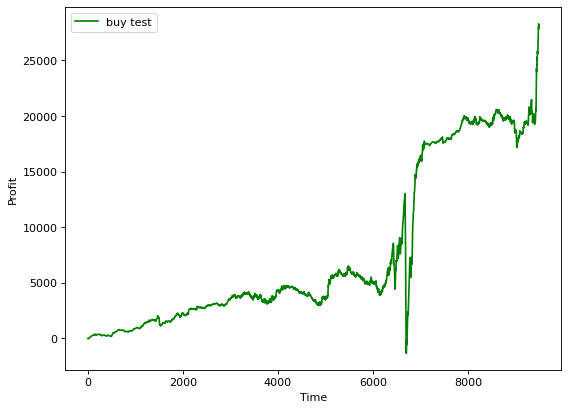

In [197]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(total_profit_records_all), 'g', label = 'buy test')
plt.xlabel("Time")
plt.ylabel("Profit")
plt.legend()
plt

In [143]:
# sell signal alone
total_profit_sell = 0
total_profit_records_sell = []
for window_idx in window_idxes_sell:
    try:
        # if sell signal exists 
        max_arg = torch.argmax(test_output[window_idx])
        min_arg = torch.argmin(test_output[window_idx])
        actural_selling_record = data.loc[(  data['Date'] == str(rnn_test_date[window_idx+max_arg][0]).replace('T00:00:00.000000000', ''))]
        actural_buying_record = data.loc[(  data['Date'] == str(rnn_test_date[window_idx+min_arg][0]).replace('T00:00:00.000000000', ''))]
        actural_selling_price = actural_selling_record['Close'].values
        actural_buying_price = actural_buying_record['Close'].values
        day_trade_profit = actural_selling_price - actural_buying_price
        total_profit_sell += day_trade_profit
        total_profit_records_sell.append(total_profit_sell[0])
    except:
        print('window_idx: %s' % window_idx)
        print('max_arg: %s' % max_arg)
        print('min_arg: %s' % min_arg)
total_profit_sell

window_idx: 10596
max_arg: tensor(10)
min_arg: tensor(6)
window_idx: 10597
max_arg: tensor(10)
min_arg: tensor(6)
window_idx: 10598
max_arg: tensor(10)
min_arg: tensor(6)
window_idx: 10599
max_arg: tensor(10)
min_arg: tensor(6)
window_idx: 10600
max_arg: tensor(10)
min_arg: tensor(6)
window_idx: 10601
max_arg: tensor(10)
min_arg: tensor(6)
window_idx: 10602
max_arg: tensor(10)
min_arg: tensor(6)
window_idx: 10603
max_arg: tensor(10)
min_arg: tensor(6)
window_idx: 10604
max_arg: tensor(10)
min_arg: tensor(6)
window_idx: 10605
max_arg: tensor(10)
min_arg: tensor(6)


array([14955.968391])

<module 'matplotlib.pyplot' from 'c:\\users\\zhhua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

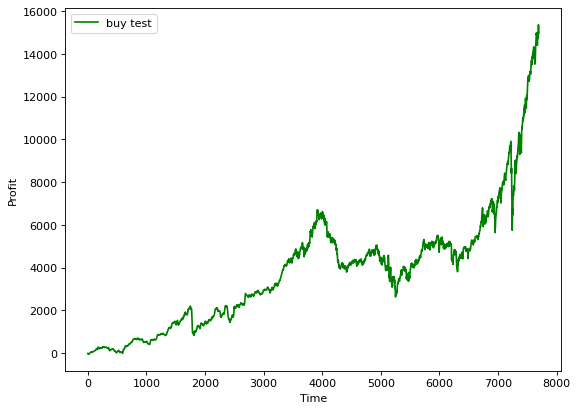

In [149]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(total_profit_records_sell), 'g', label = 'buy test')
plt.xlabel("Time")
plt.ylabel("Profit")
plt.legend()
plt

In [203]:
initial_price_window_idx = torch.argmin(test_output[window_idxes_all[0]])
initial_buying_record = data.loc[(  data['Date'] == str(rnn_test_date[window_idxes_all[0]+initial_price_window_idx][0]).replace('T00:00:00.000000000', ''))]
initial_buying_price = initial_buying_record['Close'].values[0]
share_amount = int(1000000/initial_buying_price)
share_amount

9203